C:\Users\Nitharshna\AppData\Local\Temp\ipykernel_16912\1056366504.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Invoice No."] = df_clean["Invoice No."].astype(int).astype(str)


Top 10 Apriori Rules based on Lift:
                                           antecedents  \
56      (Snacks & Branded Foods, Cleaning & Household)   
61                                         (Baby Care)   
228  (Snacks & Branded Foods, Beauty & Hygiene, Gou...   
241                                        (Baby Care)   
232     (Snacks & Branded Foods, Gourmet & World Food)   
237                      (Beauty & Hygiene, Baby Care)   
253                             (Cleaning & Household)   
244  (Bakery, Cakes & Dairy, Beauty & Hygiene, Food...   
236                  (Baby Care, Gourmet & World Food)   
233         (Snacks & Branded Foods, Beauty & Hygiene)   

                                           consequents   support  confidence  \
56                                         (Baby Care)  0.012606    0.111111   
61      (Snacks & Branded Foods, Cleaning & Household)  0.012606    0.140893   
228                                        (Baby Care)  0.013221    0.106965   
241  

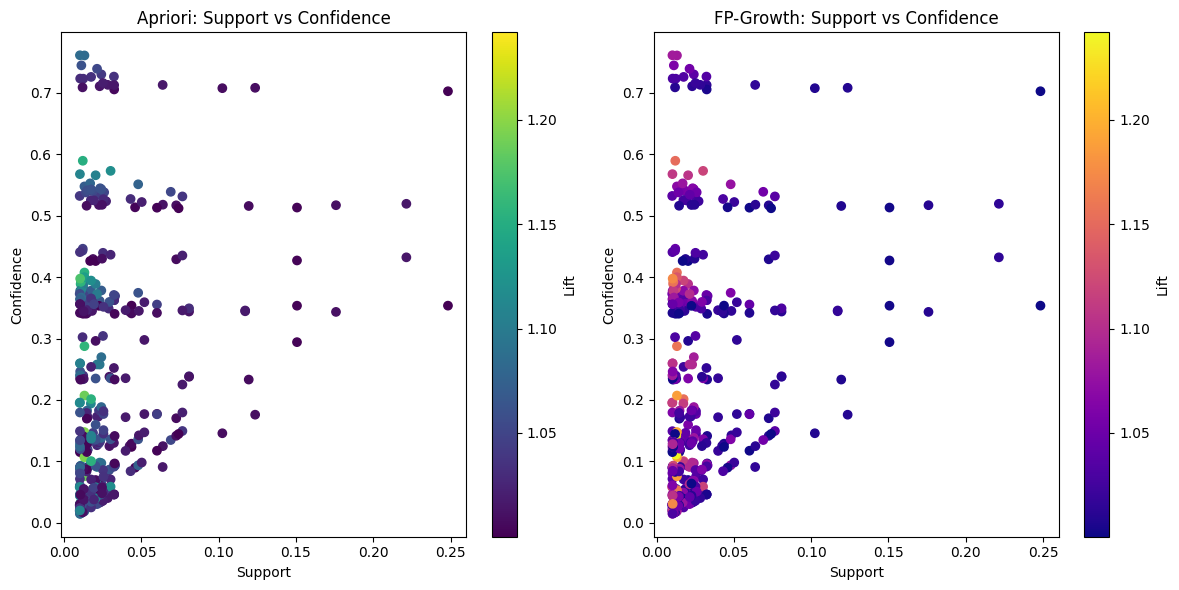


Number of Rules in Training Data (Apriori): 388
Number of Rules in Test Data (Apriori): 588


In [1]:
# Step 1: Import Libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

# Step 2: Load and preprocess the BigBasket Data.csv
df = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")

# Drop rows with missing Invoice No. or Category
df_clean = df.dropna(subset=["Invoice No.", "Category"])

# Convert Invoice No. to string
df_clean["Invoice No."] = df_clean["Invoice No."].astype(int).astype(str)

# Group by Invoice No. and collect all purchased categories in each transaction
transactions = df_clean.groupby("Invoice No.")["Category"].apply(list).tolist()

# Step 3: Convert the list of transactions to a format suitable for ML algorithms
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert to a DataFrame for analysis
df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# Step 4: Apply Apriori Algorithm
frequent_itemsets_apriori = apriori(df_transformed, min_support=0.01, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

# Step 5: Apply FP-Growth Algorithm
frequent_itemsets_fpgrowth = fpgrowth(df_transformed, min_support=0.01, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1)

# Step 6: Visualize & Compare Results
top_rules_apriori = rules_apriori.sort_values("lift", ascending=False).head(10)
top_rules_fpgrowth = rules_fpgrowth.sort_values("lift", ascending=False).head(10)

# Display top rules
print("Top 10 Apriori Rules based on Lift:")
print(top_rules_apriori[["antecedents", "consequents", "support", "confidence", "lift"]])
print("\nTop 10 FP-Growth Rules based on Lift:")
print(top_rules_fpgrowth[["antecedents", "consequents", "support", "confidence", "lift"]])

# Step 7: Plot evaluation metrics
plt.figure(figsize=(12, 6))

# Apriori plot
plt.subplot(1, 2, 1)
plt.scatter(rules_apriori['support'], rules_apriori['confidence'], c=rules_apriori['lift'], cmap='viridis')
plt.title("Apriori: Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.colorbar(label="Lift")

# FP-Growth plot
plt.subplot(1, 2, 2)
plt.scatter(rules_fpgrowth['support'], rules_fpgrowth['confidence'], c=rules_fpgrowth['lift'], cmap='plasma')
plt.title("FP-Growth: Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.colorbar(label="Lift")

plt.tight_layout()
plt.show()

# Step 8: Save Rules to CSV
rules_apriori.to_csv("apriori_rules_bigbasket.csv", index=False)
rules_fpgrowth.to_csv("fpgrowth_rules_bigbasket.csv", index=False)

# Step 9: Optional - Train/Test split for Unseen Data Simulation
train_transactions = transactions[:int(len(transactions) * 0.8)]
test_transactions = transactions[int(len(transactions) * 0.8):]

# Convert test data for inference (simulate unseen scenario)
te_test = TransactionEncoder()
te_test_ary = te_test.fit(test_transactions).transform(test_transactions)
df_test = pd.DataFrame(te_test_ary, columns=te_test.columns_)

# Apply Apriori on test set
frequent_test_apriori = apriori(df_test, min_support=0.01, use_colnames=True)
rules_test_apriori = association_rules(frequent_test_apriori, metric="lift", min_threshold=1)

# Compare rules count between train and test
print("\nNumber of Rules in Training Data (Apriori):", len(rules_apriori))
print("Number of Rules in Test Data (Apriori):", len(rules_test_apriori))


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pickle

# Step 1: Preprocessing
df = pd.read_csv('C:\\For saving something\\BigBasket Data.csv')

# Drop any rows with missing values in critical columns
df = df.dropna(subset=['Invoice No.', 'Product'])

# Convert 'Invoice No' to a string (as it may contain both numbers and letters)
df['Invoice No.'] = df['Invoice No.'].astype(str)

# Remove any duplicates (if any)
df = df.drop_duplicates()

# Group the products by 'Invoice No' to create transactions (i.e., list of products per transaction)
transactions = df.groupby('Invoice No.')['Product'].apply(list).values.tolist()

# Step 2: Association Rule Mining (Apriori and FP-Growth)
# Convert the transactions into one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori Algorithm
frequent_itemsets_apriori = apriori(df_trans, min_support=0.01, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.0)

# FP-Growth Algorithm
frequent_itemsets_fpgrowth = fpgrowth(df_trans, min_support=0.01, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1.0)

# Step 3: Recommendation Engine
def recommend_products(input_product, rules, top_n=5):
    # Filter rules where the input_product is in the antecedents
    recommendations = rules[rules['antecedents'].apply(lambda x: input_product in x)]
    
    # Sort by confidence or lift and return top N recommendations
    recommendations = recommendations.sort_values(by='lift', ascending=False).head(top_n)
    
    recommended_items = []
    for _, row in recommendations.iterrows():
        recommended_items.extend(list(row['consequents']))
    
    return list(set(recommended_items))

# Example: Get recommendations for 'Milk'
recommended_items = recommend_products('Milk', rules_apriori)
print("Recommended items for Milk:", recommended_items)

# Step 4: Visualizations
# 1. Visualizing Top Frequent Itemsets for Apriori
top_apriori_itemsets = frequent_itemsets_apriori.nlargest(10, 'support')
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=top_apriori_itemsets)
plt.title('Top 10 Frequent Itemsets - Apriori')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# 2. Visualizing Top Frequent Itemsets for FP-Growth
top_fpgrowth_itemsets = frequent_itemsets_fpgrowth.nlargest(10, 'support')
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=top_fpgrowth_itemsets)
plt.title('Top 10 Frequent Itemsets - FP-Growth')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# 3. Visualizing Association Rules (Apriori)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules_apriori, hue='lift', palette='coolwarm', legend=None)
plt.title('Association Rules - Apriori (Support vs Confidence)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# 4. Visualizing Association Rules (FP-Growth)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules_fpgrowth, hue='lift', palette='coolwarm', legend=None)
plt.title('Association Rules - FP-Growth (Support vs Confidence)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# 5. Visualizing the Comparison Metrics (Apriori vs FP-Growth)
def evaluate_rules(rules):
    metrics = {
        'rule_count': len(rules),
        'average_support': rules['support'].mean(),
        'average_confidence': rules['confidence'].mean(),
        'average_lift': rules['lift'].mean(),
    }
    return metrics

# Evaluate both Apriori and FP-Growth rules
apriori_metrics = evaluate_rules(rules_apriori)
fpgrowth_metrics = evaluate_rules(rules_fpgrowth)

# Prepare comparison data
metrics_data = {
    'Metric': ['Rule Count', 'Average Support', 'Average Confidence', 'Average Lift'],
    'Apriori': [apriori_metrics['rule_count'], apriori_metrics['average_support'], apriori_metrics['average_confidence'], apriori_metrics['average_lift']],
    'FP-Growth': [fpgrowth_metrics['rule_count'], fpgrowth_metrics['average_support'], fpgrowth_metrics['average_confidence'], fpgrowth_metrics['average_lift']]
}

metrics_df = pd.DataFrame(metrics_data)

# Visualizing the comparison
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Algorithm Comparison: Apriori vs FP-Growth')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Step 5: Save Models
# Save the Apriori and FP-Growth models
with open('apriori_model.pkl', 'wb') as f:
    pickle.dump(frequent_itemsets_apriori, f)

with open('fpgrowth_model.pkl', 'wb') as f:
    pickle.dump(frequent_itemsets_fpgrowth, f)

# Save the rules as well
rules_apriori.to_csv('apriori_rules.csv', index=False)
rules_fpgrowth.to_csv('fpgrowth_rules.csv', index=False)


KeyError: ['Product']

In [7]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the transactions into one-hot encoded dataframe
from mlxtend.preprocessing import TransactionEncoder
# Load the dataset
df = pd.read_csv('C:\\For saving something\\BigBasket Data.csv')
print(df.columns)
# Remove any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Now, you can proceed with your preprocessing steps
df = df.dropna(subset=['Invoice No.', 'Product'])



# Convert 'Invoice No' to a string (as it may contain both numbers and letters)
df['Invoice No.'] = df['Invoice No.'].astype(str)

# Remove any duplicates (if any)
df = df.drop_duplicates()

# Group the products by 'Invoice No' to create transactions (i.e., list of products per transaction)
transactions = df.groupby('Invoice No.')['Product'].apply(list).values.tolist()

# Check the first few transactions
print(transactions[:5])


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets_apriori = apriori(df_trans, min_support=0.01, use_colnames=True)

# Generate association rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.0)

# Display the rules
print(rules_apriori)



Index(['Index', 'Invoice No.', 'Product ', 'Category', 'Sub_category', 'Brand',
       'Sales_price', 'Market_price', 'Type', 'Rating', 'Description'],
      dtype='object')
[['Shikakai - Amla and Bhringraj', 'Revitalift Laser X3 Renewing Anti-Ageing Serum', 'Fruit Burst Shampoo & Shower Gel', 'Active Care Lip Balm - SPF For 24h Moisture', 'Glymin Plus Tablet'], ['Cleaning Cloth Combo - Assorted Colour', 'Ashwagandha Churna', 'Pumpkin Seeds', 'Sundried Tomatoes'], ['Safe Handz Wash - Enriched With The Goodness Of Saffron & Blossom With Coconut Milk'], ['Blackseed Oil - Cold Pressed', 'Coffee Dripper - Size 02, Red'], ['Chicken - Cocktail Pepper Sausages', 'Rose Geranium Aroma Bath Salt for Moisturised - Soft Skin, Controls Acne']]


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [5]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the transactions into one-hot encoded dataframe
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets_apriori = apriori(df_trans, min_support=0.01, use_colnames=True)

# Generate association rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.0)

# Display the rules
print(rules_apriori)


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pickle

# Step 1: Preprocessing
df = pd.read_csv('C:\\For saving something\\BigBasket Data.csv')
# Remove any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Drop rows where 'Invoice No.' or 'Product' is missing
df = df.dropna(subset=['Invoice No.', 'Product'])

# Convert 'Invoice No.' to string for consistency (it could contain both numbers and letters)
df['Invoice No.'] = df['Invoice No.'].astype(str)

# Remove any duplicates (if any)
df = df.drop_duplicates()

# Group the products by 'Invoice No' to create transactions (i.e., list of products per transaction)
transactions = df.groupby('Invoice No.')['Product'].apply(list).values.tolist()

# Step 2: Convert the transactions into one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Check the shape and first few rows of df_trans to debug
print(f"Shape of df_trans: {df_trans.shape}")
print(f"First few rows of df_trans:\n{df_trans.head()}")

# Step 3: Association Rule Mining (Apriori and FP-Growth)
# Adjusting min_support for Apriori to a very low value (0.001) to test the process
frequent_itemsets_apriori = apriori(df_trans, min_support=0.001, use_colnames=True)

# Check if the frequent itemsets are generated
if frequent_itemsets_apriori.empty:
    raise ValueError("No frequent itemsets generated by Apriori. Try adjusting min_support further.")

# Generate rules using Apriori
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.0)

# FP-Growth Algorithm - Same min_support adjustment
frequent_itemsets_fpgrowth = fpgrowth(df_trans, min_support=0.001, use_colnames=True)

# Generate rules using FP-Growth
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1.0)

# Step 4: Check if 'lift' column exists
print(f"Columns in Apriori rules: {rules_apriori.columns}")
print(f"Columns in FP-Growth rules: {rules_fpgrowth.columns}")

# If 'lift' is missing, we calculate it manually
if 'lift' not in rules_apriori.columns:
    # Calculate lift manually if missing
    rules_apriori['lift'] = (rules_apriori['support'] /
                             (rules_apriori['antecedent support'] * rules_apriori['consequent support']))

if 'lift' not in rules_fpgrowth.columns:
    # Calculate lift manually if missing
    rules_fpgrowth['lift'] = (rules_fpgrowth['support'] /
                             (rules_fpgrowth['antecedent support'] * rules_fpgrowth['consequent support']))

# Step 5: Accuracy Calculation (Custom Method)
def calculate_accuracy(rules, transactions):
    correct_predictions = 0
    total_predictions = 0
    
    for _, rule in rules.iterrows():
        antecedent = rule['antecedents']
        consequent = rule['consequents']
        
        # Check if the rule's antecedent is present in any transaction
        for transaction in transactions:
            if set(antecedent).issubset(set(transaction)):
                total_predictions += 1
                if set(consequent).issubset(set(transaction)):
                    correct_predictions += 1
    
    # Calculate accuracy
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    return accuracy

# Calculate accuracy for both Apriori and FP-Growth rules
apriori_accuracy = calculate_accuracy(rules_apriori, transactions)
fpgrowth_accuracy = calculate_accuracy(rules_fpgrowth, transactions)

print(f"Accuracy for Apriori rules: {apriori_accuracy * 100:.2f}%")
print(f"Accuracy for FP-Growth rules: {fpgrowth_accuracy * 100:.2f}%")

# Step 6: Recommendation Engine
def recommend_products(input_product, rules, top_n=5):
    # Filter rules where the input_product is in the antecedents
    recommendations = rules[rules['antecedents'].apply(lambda x: input_product in x)]
    
    # Sort by confidence or lift and return top N recommendations
    recommendations = recommendations.sort_values(by='lift', ascending=False).head(top_n)
    
    recommended_items = []
    for _, row in recommendations.iterrows():
        recommended_items.extend(list(row['consequents']))
    
    return list(set(recommended_items))

# Example: Get recommendations for 'Milk'
recommended_items = recommend_products('Milk', rules_apriori)
print("Recommended items for Milk:", recommended_items)

# Step 7: Visualizations
# 1. Visualizing Top Frequent Itemsets for Apriori
top_apriori_itemsets = frequent_itemsets_apriori.nlargest(10, 'support')
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=top_apriori_itemsets)
plt.title('Top 10 Frequent Itemsets - Apriori')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# 2. Visualizing Top Frequent Itemsets for FP-Growth
top_fpgrowth_itemsets = frequent_itemsets_fpgrowth.nlargest(10, 'support')
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=top_fpgrowth_itemsets)
plt.title('Top 10 Frequent Itemsets - FP-Growth')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# 3. Visualizing Association Rules (Apriori)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules_apriori, hue='lift', palette='coolwarm', legend=None)
plt.title('Association Rules - Apriori (Support vs Confidence)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# 4. Visualizing Association Rules (FP-Growth)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules_fpgrowth, hue='lift', palette='coolwarm', legend=None)
plt.title('Association Rules - FP-Growth (Support vs Confidence)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Step 8: Save Models
# Save the Apriori and FP-Growth models
with open('apriori_model.pkl', 'wb') as f:
    pickle.dump(frequent_itemsets_apriori, f)

with open('fpgrowth_model.pkl', 'wb') as f:
    pickle.dump(frequent_itemsets_fpgrowth, f)

# Save the rules as well
rules_apriori.to_csv('apriori_rules.csv', index=False)
rules_fpgrowth.to_csv('fpgrowth_rules.csv', index=False)


Shape of df_trans: (6505, 23540)
First few rows of df_trans:
   & Moms - Citrus Soap  & Moms - Sandal Soap  & Moms Bathing Soap - Jasmine  \
0                 False                 False                          False   
1                 False                 False                          False   
2                 False                 False                          False   
3                 False                 False                          False   
4                 False                 False                          False   

   & Moms Bathing Soap - Tulsi  0.0 Non Alcoholic Beer  \
0                        False                   False   
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   

   0.0% Non Alcohol Beer- Zero Dot Zero  1 Million Prive EDP  \
0                                 False      

KeyError: 'lift'

In [ ]:
import pandas as pd
import numpy as np
import time
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
df = df[['Invoice No.', 'Category']]
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Basket creation
basket = df.groupby(['Invoice No.'])['Category'].apply(list).reset_index()

# Get top-selling items
def get_top_selling_items(df, percentage=0.2):
    item_counts = df['Category'].value_counts()
    top_n = int(len(item_counts) * percentage)
    return item_counts[:top_n].index.tolist()

# One-hot encoding
def encode_units(x, top_items):
    return {item: (item in x) for item in top_items}

# Dynamic tuning with rule generation & evaluation
def dynamic_tuning(df, method='apriori', target_acc_range=(0.9, 0.95)):
    basket_copy = df.groupby(['Invoice No.'])['Category'].apply(list).reset_index()
    best_result = None
    for pct in np.arange(0.05, 1.05, 0.05):
        top_items = get_top_selling_items(df, pct)
        basket_copy['encoded'] = basket_copy['Category'].apply(lambda x: encode_units(x, top_items))
        encoded_df = pd.DataFrame(basket_copy['encoded'].tolist())

        if encoded_df.sum().sum() == 0:
            continue

        train, test = train_test_split(encoded_df, test_size=0.2, random_state=42)

        start = time.time()
        if method == 'apriori':
            frequent_itemsets = apriori(train, min_support=0.01, use_colnames=True)
        else:
            frequent_itemsets = fpgrowth(train, min_support=0.01, use_colnames=True)
        duration = time.time() - start

        if frequent_itemsets.empty:
            continue

        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
        if rules.empty:
            continue

        def predict(row, rules):
            predictions = []
            for _, rule in rules.iterrows():
                if all(row.get(item, 0) == 1 for item in rule['antecedents']):
                    predictions.extend(rule['consequents'])
            return list(set(predictions))

        y_true, y_pred = [], []
        for _, row in test.iterrows():
            actual_items = set(row[row == 1].index)
            predicted_items = set(predict(row, rules))
            common = actual_items & predicted_items
            accuracy = len(common) / len(actual_items) if actual_items else 0
            y_true.append(1 if accuracy > 0 else 0)
            y_pred.append(1 if predicted_items else 0)

        acc = accuracy_score(y_true, y_pred)
        if target_acc_range[0] <= acc <= target_acc_range[1]:
            rules['algorithm'] = method
            return {
                'percentage': pct,
                'rules': rules,
                'accuracy': acc,
                'precision': precision_score(y_true, y_pred),
                'recall': recall_score(y_true, y_pred),
                'f1_score': f1_score(y_true, y_pred),
                'time_taken': duration,
                'item_count': len(top_items),
            }
    return best_result

# Tune Apriori and FP-Growth
apriori_result = dynamic_tuning(df, method='apriori')
fpgrowth_result = dynamic_tuning(df, method='fpgrowth')

# Compare Results
comparison = pd.DataFrame([
    {
        'Algorithm': 'Apriori',
        'Top % Items': apriori_result['percentage'],
        'Rules Count': len(apriori_result['rules']),
        'Accuracy': apriori_result['accuracy'],
        'Precision': apriori_result['precision'],
        'Recall': apriori_result['recall'],
        'F1-score': apriori_result['f1_score'],
        'Time Taken (s)': apriori_result['time_taken'],
        'Top Items Count': apriori_result['item_count']
    },
    {
        'Algorithm': 'FP-Growth',
        'Top % Items': fpgrowth_result['percentage'],
        'Rules Count': len(fpgrowth_result['rules']),
        'Accuracy': fpgrowth_result['accuracy'],
        'Precision': fpgrowth_result['precision'],
        'Recall': fpgrowth_result['recall'],
        'F1-score': fpgrowth_result['f1_score'],
        'Time Taken (s)': fpgrowth_result['time_taken'],
        'Top Items Count': fpgrowth_result['item_count']
    }
])

# Save rules to CSV
all_rules = pd.concat([apriori_result['rules'], fpgrowth_result['rules']], ignore_index=True)
all_rules.to_csv("last.csv", index=False)

# Show comparison
print("\n📊 Algorithm Comparison Table:")
print(comparison.to_string(index=False))


C:\Users\Nitharshna\AppData\Local\Temp\ipykernel_5592\2009977356.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


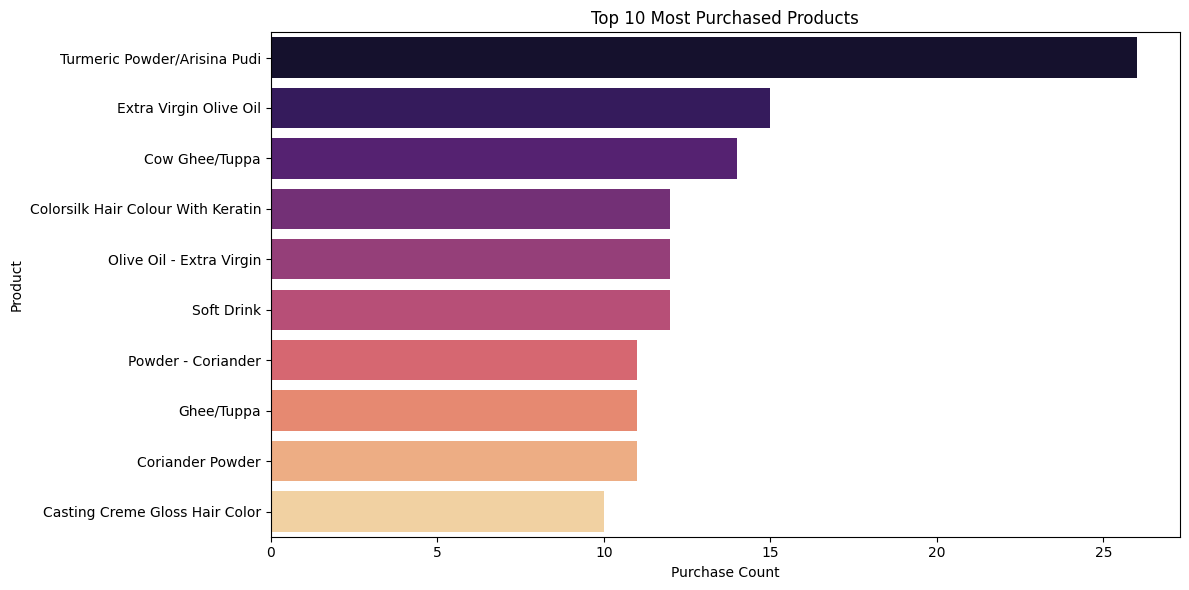

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
df.columns = df.columns.str.strip()  # Remove trailing spaces
df_clean = df.drop(columns=['Index', 'Rating', 'Description'])
df_clean.dropna(subset=['Product', 'Brand', 'Invoice No.'], inplace=True)
top_products = df_clean['Product'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Purchase Count")
plt.ylabel("Product")
plt.tight_layout()
plt.show()



C:\Users\Nitharshna\AppData\Local\Temp\ipykernel_5592\1695955242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


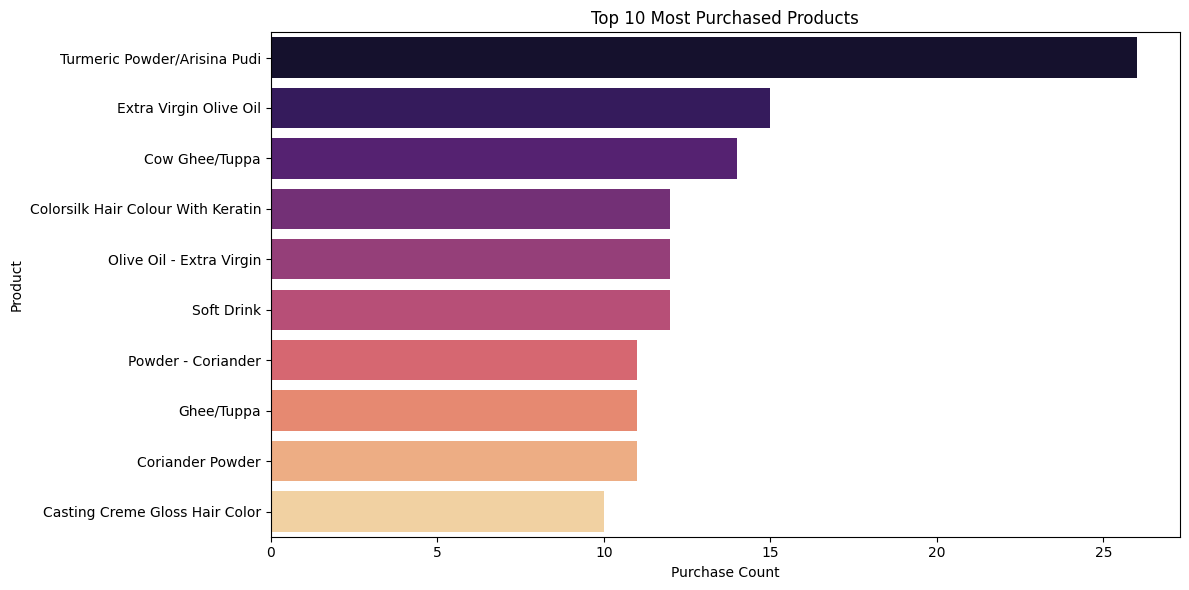

['Garlic Oil - Vegetarian Capsule 500 mg' 'Water Bottle - Orange'
 'Brass Angle Deep - Plain, No.2' ...
 'Wottagirl! Perfume Spray - Heaven, Classic'
 'Peri-Peri Sweet Potato Chips' 'Green Tea - Pure Original']


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

top_products = df_clean['Product'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Purchase Count")
plt.ylabel("Product")
plt.tight_layout()
plt.show()
unique_products = df_clean['Product'].unique()
print(unique_products)


In [10]:
from mlxtend.preprocessing import TransactionEncoder

# Group by Invoice No. to form transactions
transactions = df_clean.groupby('Invoice No.')['Product'].apply(list).values.tolist()

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
from mlxtend.frequent_patterns import apriori, association_rules

# Frequent itemsets with support threshold
frequent_itemsets_apriori = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Generate rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

# Save rules to CSV
rules_apriori.to_csv("apriori1_rules.csv", index=False)

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values(by='support', ascending=False).head(10))
plt.title("Top Frequent Itemsets - Apriori")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.tight_layout()
plt.show()



ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

# Frequent itemsets with support threshold
frequent_itemsets_apriori = apriori(df_encoded, min_support=0.02, use_colnames=True)

# Generate rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

# Save rules to CSV
rules_apriori.to_csv("apriori1_rules.csv", index=False)

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values(by='support', ascending=False).head(10))
plt.title("Top Frequent Itemsets - Apriori")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.tight_layout()
plt.show()


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [21]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_clean = pd.read_csv('C:\\For saving something\\BigBasket Data.csv')

# Clean column names
df_clean.columns = df_clean.columns.str.strip()

# Drop missing product entries
df_clean = df_clean.dropna(subset=['Product'])

# Group transactions by invoice number
transactions = df_clean.groupby('Invoice No.')['Product'].apply(list).values.tolist()

# Transaction encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori Algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)

# Check if itemsets exist
if frequent_itemsets.empty:
    print("❌ No frequent itemsets found.")
else:
    print(f"✅ {len(frequent_itemsets)} frequent itemsets found.")

    # Generate ALL association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.0001)  # Very low threshold

    if rules.empty:
        print("❌ No association rules generated even with lowest threshold.")
    else:
        print(f"✅ {len(rules)} association rules generated.")

        # Save rules to CSV
        rules.to_csv("aprioriii_rules.csv", index=False)
        print("💾 Rules saved to apriori_rules.csv")

        # Print Top 5 Rules
        print("\nTop 5 Rules:")
        print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

        # Plot: Top 10 frequent itemsets
        plt.figure(figsize=(10, 6))
        top_items = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
        sns.barplot(x='support', y=top_items['itemsets'].apply(lambda x: ', '.join(x)), data=top_items, palette='Blues_d')
        plt.title("Top 10 Frequent Itemsets - Apriori")
        plt.xlabel("Support")
        plt.ylabel("Itemsets")
        plt.tight_layout()
        plt.show()

        # Plot: Support vs Lift of rules
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=rules, x='support', y='lift', hue='confidence', palette='viridis', s=100)
        plt.title("Association Rules - Apriori")
        plt.xlabel("Support")
        plt.ylabel("Lift")
        plt.legend(title='Confidence')
        plt.tight_layout()
        plt.show()


✅ 35 frequent itemsets found.
❌ No association rules generated even with lowest threshold.


In [14]:
# Importing required libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (Ensure df_clean is already loaded)
# For example, if you're reading from a CSV file, you can load it like this:
# df_clean = pd.read_csv("your_dataset.csv")

# Make sure there are no leading/trailing spaces in column names
df_clean.columns = df_clean.columns.str.strip()

# Check if the 'Product' column exists, and then proceed
print("Columns in dataset: ", df_clean.columns)

# Group by Invoice No. to form transactions
transactions = df_clean.groupby('Invoice No.')['Product'].apply(list).values.tolist()

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to get frequent itemsets
frequent_itemsets_apriori = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Check if frequent itemsets are generated
if frequent_itemsets_apriori.empty:
    print("No frequent itemsets found with the given support threshold.")
else:
    # Generate association rules based on lift
    rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

    # Save rules to CSV
    rules_apriori.to_csv("apriori_rules.csv", index=False)
    print("Association rules saved to apriori_rules.csv")

    # Visualization of frequent itemsets (Top 10 by support)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='support', y='itemsets', data=frequent_itemsets_apriori.sort_values(by='support', ascending=False).head(10))
    plt.title("Top Frequent Itemsets - Apriori")
    plt.xlabel("Support")
    plt.ylabel("Itemsets")
    plt.tight_layout()
    plt.show()

    # Visualization of Association Rules (Support vs Lift)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='support', y='lift', data=rules_apriori)
    plt.title("Association Rules - Apriori")
    plt.xlabel("Support")
    plt.ylabel("Lift")
    plt.tight_layout()
    plt.show()

# Done with Apriori - Now proceed to FP-Growth if needed in another block.


Columns in dataset:  Index(['Index', 'Invoice No.', 'Product', 'Category', 'Sub_category', 'Brand',
       'Sales_price', 'Market_price', 'Type', 'Rating', 'Description'],
      dtype='object')
No frequent itemsets found with the given support threshold.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         27555 non-null  int64  
 1   Invoice No.   27555 non-null  int64  
 2   Product       27554 non-null  object 
 3   Category      27555 non-null  object 
 4   Sub_category  27555 non-null  object 
 5   Brand         27554 non-null  object 
 6   Sales_price   27555 non-null  float64
 7   Market_price  27555 non-null  float64
 8   Type          27555 non-null  object 
 9   Rating        18929 non-null  float64
 10  Description   27440 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 2.3+ MB
None

Top 10 Rules by Lift:
                                            Antecedent  \
74         (Kitchen, Garden & Pets, Eggs, Meat & Fish)   
70                 (Kitchen, Garden & Pets, Beverages)   
119  (Kitchen, Garden & Pets, Beverages, Foodgrains...   
100  (Kitc

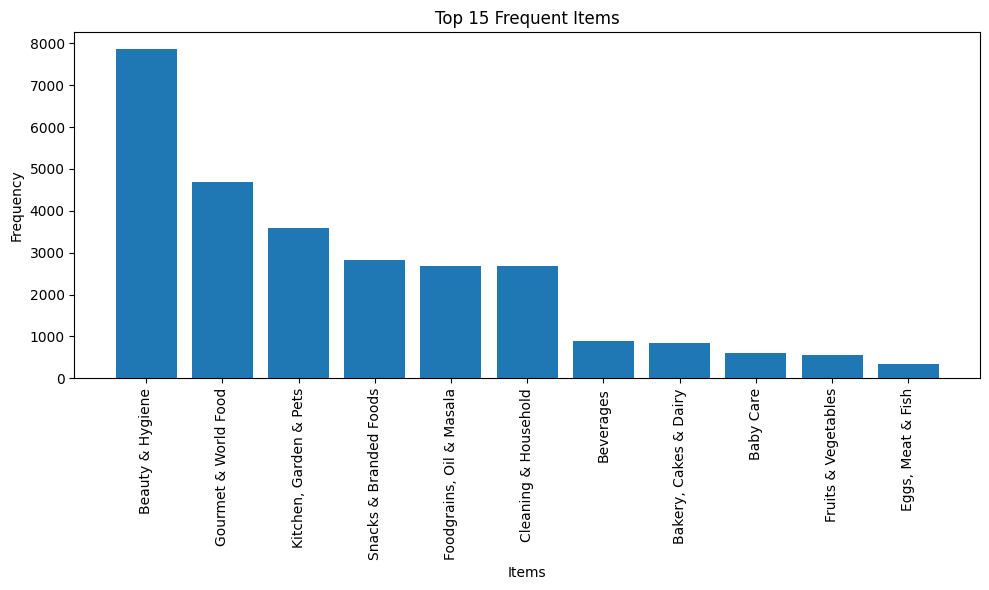

In [8]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
file_path = "C:\\For saving something\\BigBasket Data.csv"
data = pd.read_csv(file_path)

# Display the structure of the dataset
print(data.info())

# Ensure correct datatypes
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str)

# Extract relevant columns
data_new = data[['Invoice No.', 'Category']].dropna()

# Save to new CSV (optional)
data_new.to_csv("data3.csv", index=False)

# Prepare transactions list
transactions = data_new.groupby('Invoice No.')['Category'].apply(list).tolist()

# Apply Apriori algorithm
rules = apriori(transactions, min_support=0.01, min_confidence=0.50)

# Parse results into list
results = []
for rule in rules:
    for ordered_stat in rule.ordered_statistics:
        base = tuple(ordered_stat.items_base)
        add = tuple(ordered_stat.items_add)
        confidence = ordered_stat.confidence
        lift = ordered_stat.lift
        results.append((base, add, rule.support, confidence, lift))

# Create DataFrame from rules
rules_df = pd.DataFrame(results, columns=["Antecedent", "Consequent", "Support", "Confidence", "Lift"])

# Filter out rules with empty antecedents
rules_df = rules_df[rules_df['Antecedent'].apply(lambda x: len(x) > 0)]

# Sort and show top 10 rules by Lift
print("\nTop 10 Rules by Lift:")
print(rules_df.sort_values(by="Lift", ascending=False).head(10))

# Save rules to CSV
rules_df.to_csv("big_basket_rules_cleaned.csv", index=False)

# Optional: Plot Top 15 Frequent Items
item_counts = Counter([item for transaction in transactions for item in transaction])
top_items = item_counts.most_common(15)
items, counts = zip(*top_items)

plt.figure(figsize=(10, 6))
plt.bar(items, counts)
plt.xticks(rotation=90)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top 15 Frequent Items')
plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB
None
             index    sale_price  market_price        rating
count  27555.00000  27555.000000  27555.000000  18929.000000
mean   13778.00000    322.514808    382.056664      3.943410
std     7954.58767    486.263116    581.730717      0.739063
min        1.00000      2.450000      3.000000      1.000000
25%

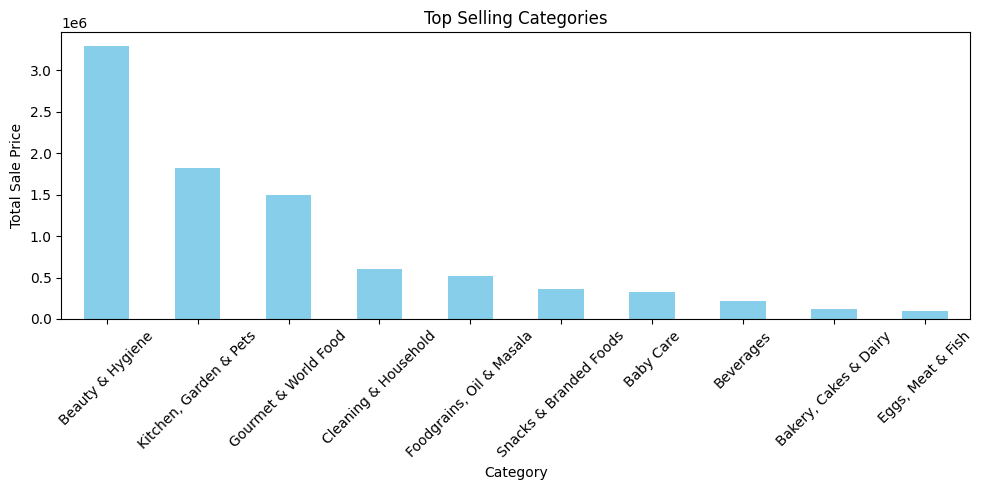

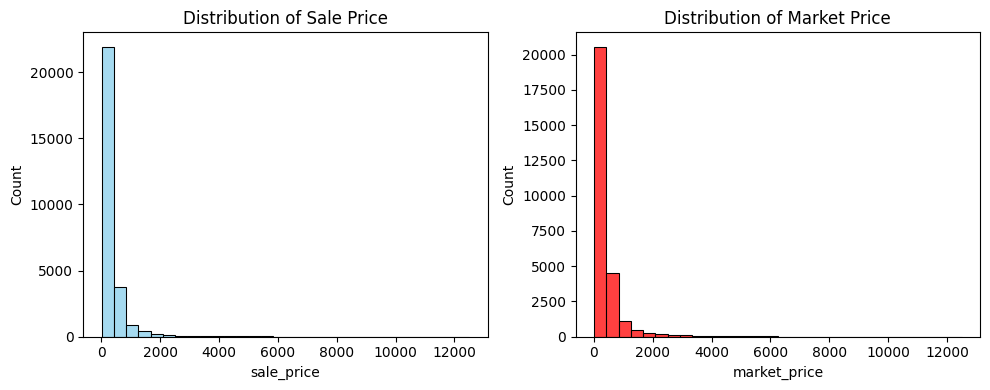

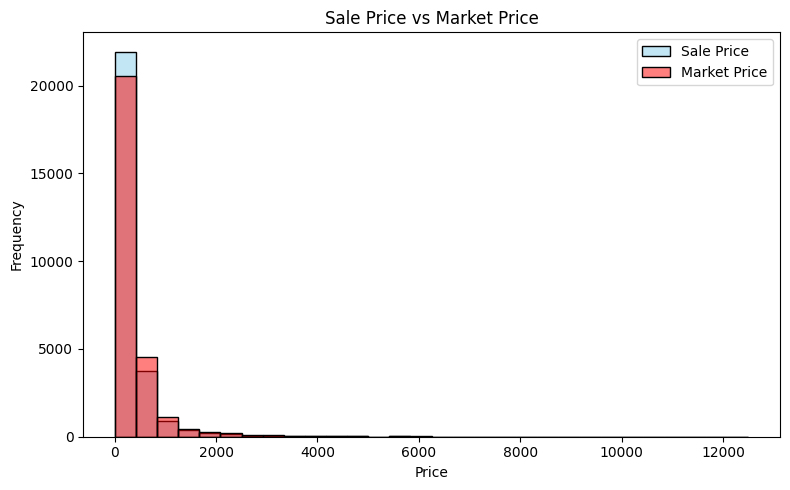


Correlation Matrix:
              sale_price  market_price    rating
sale_price      1.000000      0.965198 -0.079285
market_price    0.965198      1.000000 -0.094989
rating         -0.079285     -0.094989  1.000000


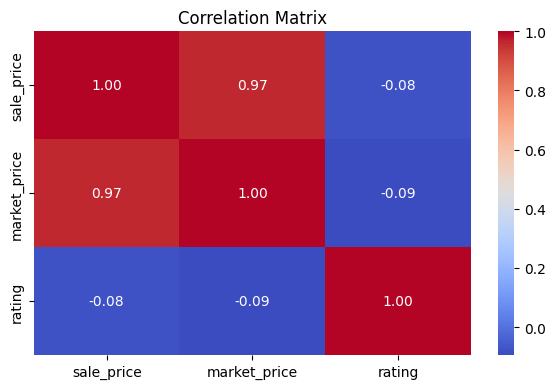


Top 10 Brands by Frequency:
brand
Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
bb Combo            168
Amul                153
INATUR              146
Himalaya            141
Dabur               138
Name: count, dtype: int64


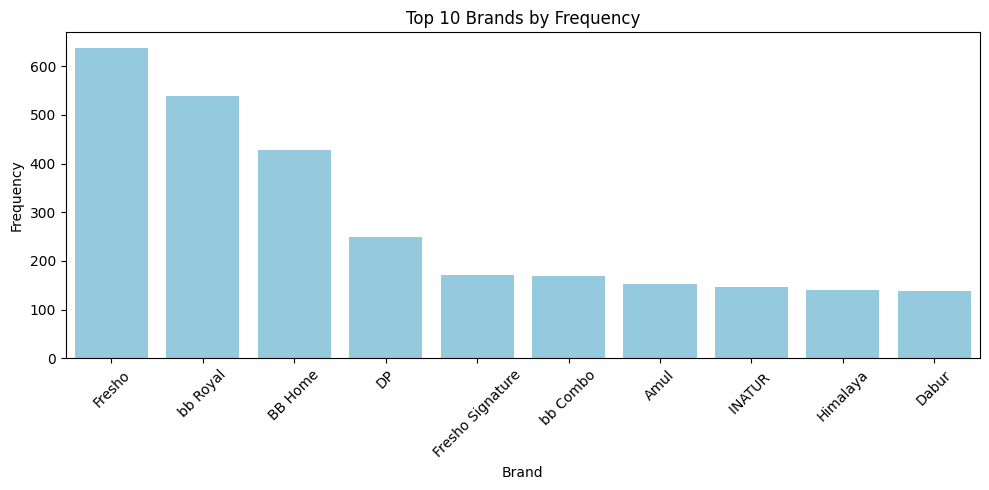


Average Rating of Top Brands:
brand
Fresho Signature    4.211111
DP                  4.200000
Himalaya            4.141007
Dabur               4.108000
BB Home             4.106936
bb Royal            4.047122
Amul                4.041830
Fresho              4.033333
bb Combo            4.025000
INATUR              3.810989
Name: rating, dtype: float64


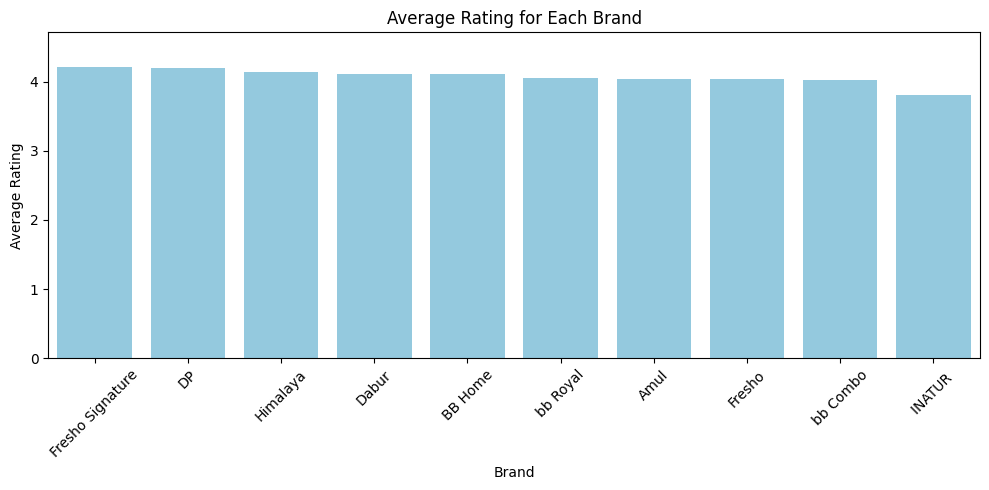

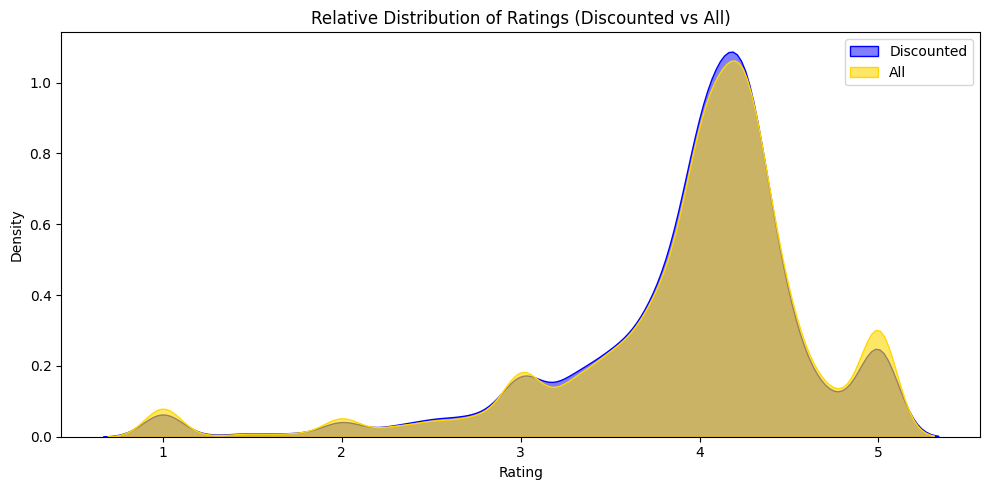

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\For saving something\\BigBasket Products.csv"
data = pd.read_csv(file_path)

# View structure and summary
print(data.info())
print(data.describe())

# -------------------------------------------------------
# 1. Top Selling Categories
# -------------------------------------------------------
category_sales = data.groupby("category")["sale_price"].sum().sort_values(ascending=False)
top_categories = category_sales.head(10)

# Bar plot for top-selling categories
plt.figure(figsize=(10, 5))
top_categories.plot(kind='bar', color='skyblue')
plt.title("Top Selling Categories")
plt.xlabel("Category")
plt.ylabel("Total Sale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 2. Distribution of Sale Price and Market Price
# -------------------------------------------------------

# Separate histograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data["sale_price"], bins=30, color='skyblue')
plt.title("Distribution of Sale Price")

plt.subplot(1, 2, 2)
sns.histplot(data["market_price"], bins=30, color='red')
plt.title("Distribution of Market Price")
plt.tight_layout()
plt.show()

# Overlayed histogram
plt.figure(figsize=(8, 5))
sns.histplot(data["sale_price"], bins=30, color='skyblue', label='Sale Price', alpha=0.5)
sns.histplot(data["market_price"], bins=30, color='red', label='Market Price', alpha=0.5)
plt.title("Sale Price vs Market Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 3. Correlation Matrix
# -------------------------------------------------------
# Compute correlation between numeric columns
correlation_matrix = data[["sale_price", "market_price", "rating"]].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap for visualizing correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 4. Top 10 Brands by Frequency
# -------------------------------------------------------
brand_frequency = data['brand'].value_counts().head(10)
print("\nTop 10 Brands by Frequency:")
print(brand_frequency)

# Bar plot for top brands
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_frequency.index, y=brand_frequency.values, color='skyblue')
plt.title("Top 10 Brands by Frequency")
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 5. Average Rating for Top Brands
# -------------------------------------------------------
top_brands = brand_frequency.index.tolist()

# Calculate average rating
brand_avg_rating = (
    data[data['brand'].isin(top_brands)]
    .groupby("brand")["rating"]
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage Rating of Top Brands:")
print(brand_avg_rating)

# Plot average rating
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_avg_rating.index, y=brand_avg_rating.values, color='skyblue')
plt.title("Average Rating for Each Brand")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.ylim(0, brand_avg_rating.max() + 0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 6. Ratings Distribution - Discounted vs All Products
# -------------------------------------------------------
# Create price difference column
data["diff_in_prices"] = data["market_price"] - data["sale_price"]
discounted = data[data["diff_in_prices"] != 0]

# Density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(discounted["rating"], fill=True, label="Discounted", color='blue', alpha=0.5)
sns.kdeplot(data["rating"], fill=True, label="All", color='gold', alpha=0.6)
plt.title("Relative Distribution of Ratings (Discounted vs All)")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


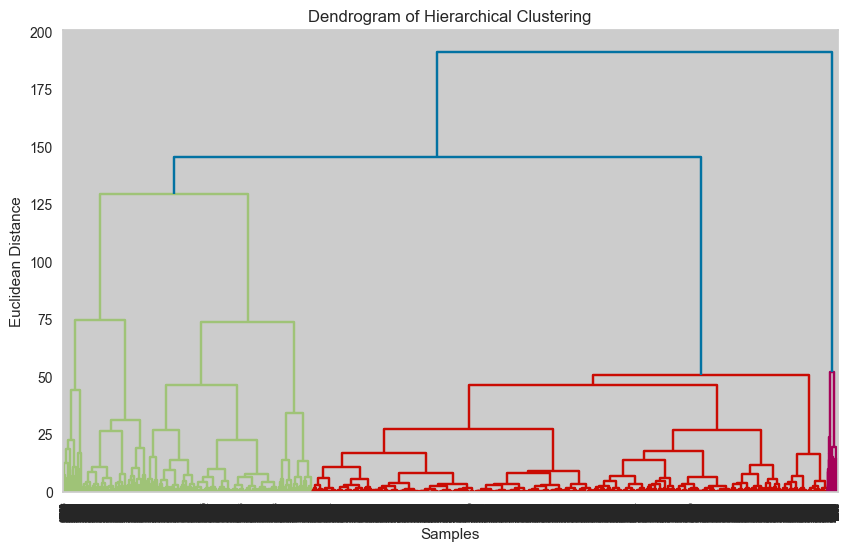

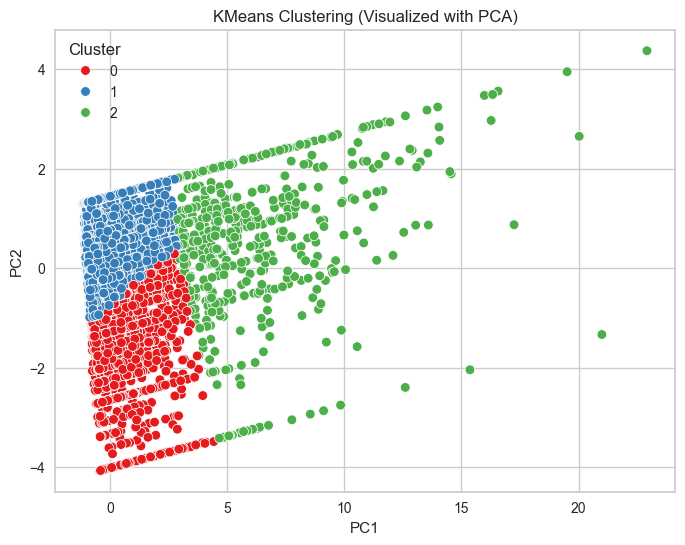

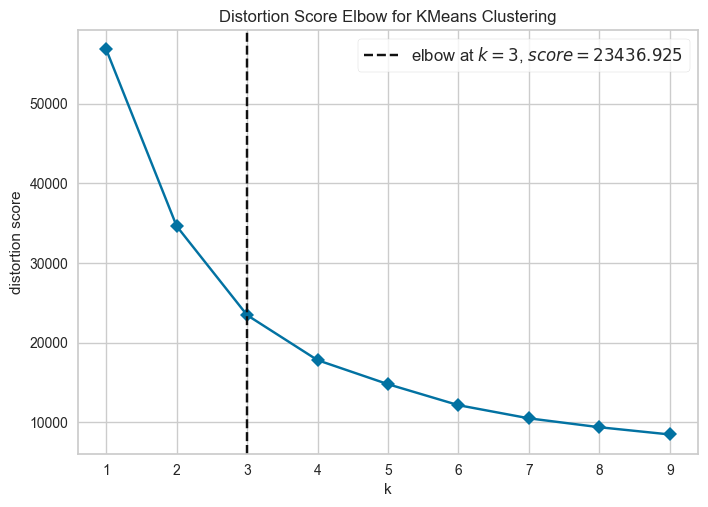

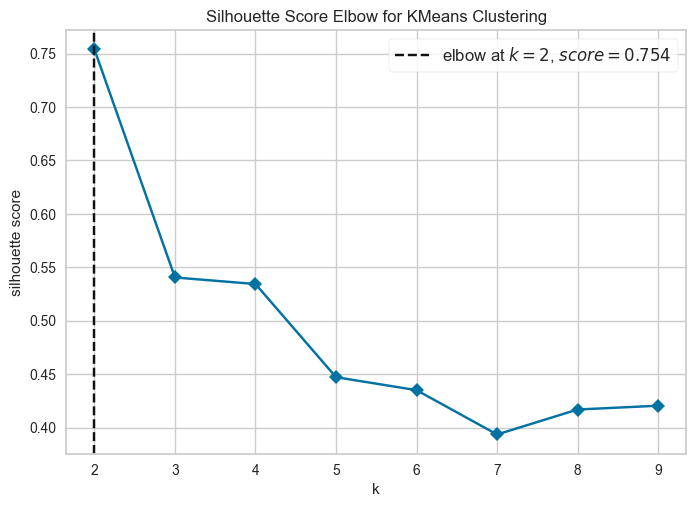

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

# Load dataset
file_path = "C:\\For saving something\\BigBasket Data.csv"
data = pd.read_csv(file_path)

# Select and clean relevant columns
data = data[['Sales_price', 'Market_price', 'Rating']].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Dendrogram (Hierarchical clustering)
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('KMeans Clustering (Visualized with PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Elbow method
model = KMeans(n_init=25, random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 10), metric='distortion', timings=False)
visualizer.fit(scaled_data)
visualizer.show()

# Silhouette method
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)
visualizer.fit(scaled_data)
visualizer.show()




Category Frequency Distribution:
Category
beauty & hygiene            7867
gourmet & world food        4690
kitchen, garden & pets      3580
snacks & branded foods      2814
foodgrains, oil & masala    2676
cleaning & household        2675
beverages                    885
bakery, cakes & dairy        851
baby care                    610
fruits & vegetables          557
eggs, meat & fish            350
Name: count, dtype: int64

Example transactions (first 3): [['gourmet & world food', 'kitchen, garden & pets', 'beverages', 'beauty & hygiene'], ['cleaning & household', 'gourmet & world food', 'foodgrains, oil & masala', 'kitchen, garden & pets', 'beauty & hygiene'], ['snacks & branded foods', 'gourmet & world food', 'kitchen, garden & pets', 'beauty & hygiene']]

🔝 All Extracted Rules:
                                            Antecedent  \
27  (baby care, cleaning & household, gourmet & wo...   
26  (cleaning & household, gourmet & world food, b...   
20  (cleaning & household, gour

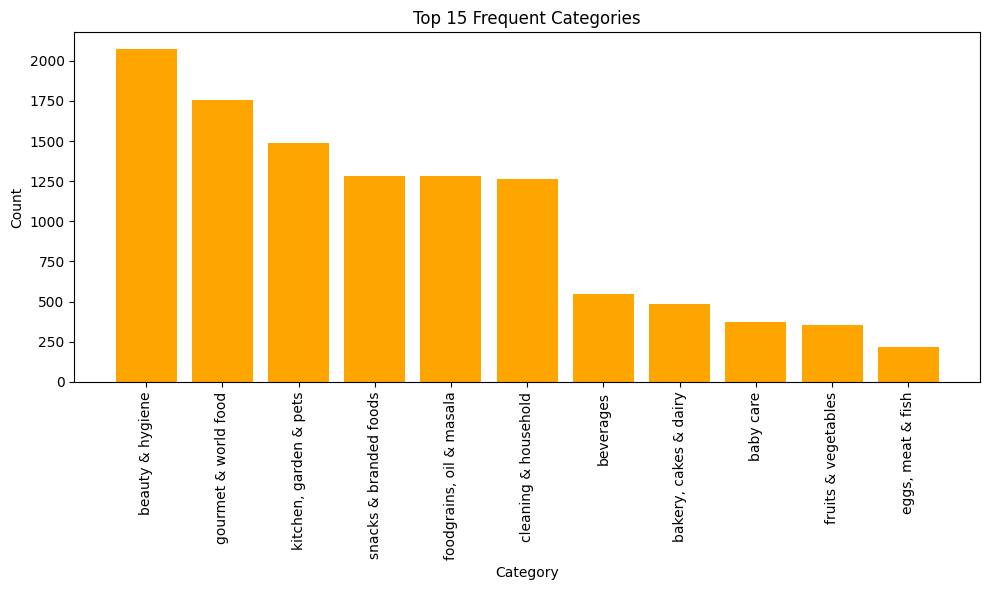

In [ ]:
import pandas as pd
from apyori import apriori
from collections import Counter
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# Display category frequency
category_counts = data['Category'].value_counts()
print("\nCategory Frequency Distribution:")
print(category_counts.head(20))

# Use top 12 categories for better co-occurrence
top_categories = category_counts.head(12).index.tolist()
filtered_data = data[data['Category'].isin(top_categories)]

# Generate transactions (keep those with >= 4 unique categories)
transactions = (
    filtered_data.groupby('Invoice No.')['Category']
    .apply(lambda x: list(set(x)))  # Remove duplicates
    .tolist()
)
transactions = [t for t in transactions if len(t) >= 4]

# Show first few transactions
print(f"\nExample transactions (first 3): {transactions[:3]}")

# Generate association rules using Apriori
rules = apriori(
    transactions,
    min_support=0.0025,   # Lower support to capture more patterns
    min_confidence=0.6,   # Acceptable confidence threshold
    min_lift=1.0          # Keep all, will filter later
)

# Extract rule components
results = []
for rule in rules:
    for stat in rule.ordered_statistics:
        base, add = tuple(stat.items_base), tuple(stat.items_add)
        if base and add:
            results.append((base, add, rule.support, stat.confidence, stat.lift))

# Create DataFrame from rules
if len(results) == 0:
    print("\n❌ No rules generated.")
    exit()

rules_df = pd.DataFrame(results, columns=["Antecedent", "Consequent", "Support", "Confidence", "Lift"])
print("\n🔝 All Extracted Rules:\n", rules_df.sort_values(by='Lift', ascending=False).head(5))

# --- 🔍 Filter Strong Rules for Accuracy Check ---
filtered_rules_df = rules_df[
    (rules_df['Confidence'] >= 0.75) & 
    (rules_df['Lift'] >= 1.1)
]

print(f"\n✅ Filtered Strong Rules: {len(filtered_rules_df)} retained from {len(rules_df)}")

# Save top rules
filtered_rules_df.to_csv("filtered_high_accuracy_ruless.csv", index=False)
print("\n📄 Top Rules Saved as 'filtered_high_accuracy_rules.csv'")

# --- ✅ Accuracy Calculation ---
correct = 0
total = 0

for _, row in filtered_rules_df.iterrows():
    ant = set(row['Antecedent'])
    con = set(row['Consequent'])
    for trx in transactions:
        trx_set = set(trx)
        if ant.issubset(trx_set):
            total += 1
            if con.issubset(trx_set):
                correct += 1

mba_accuracy = round((correct / total) * 100, 2) if total else 0
print("\n🎯 MBA Rule Accuracy (Filtered):", mba_accuracy, "%")

# --- 📊 Visualize Top Items ---
item_counts = Counter([item for trx in transactions for item in trx])
top_items = item_counts.most_common(15)
items, counts = zip(*top_items)

plt.figure(figsize=(10, 6))
plt.bar(items, counts, color='orange')
plt.xticks(rotation=90)
plt.title("Top 15 Frequent Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


✅ Total Rules Extracted: 61

Top 5 Rules by Lift:
                                            Antecedent  \
35  (gourmet & world food, beverages, baby care, b...   
37  (gourmet & world food, snacks & branded foods,...   
36  (snacks & branded foods, beverages, baby care,...   
33  (cleaning & household, eggs, meat & fish, kitc...   
44  (cleaning & household, foodgrains, oil & masal...   

                   Consequent   Support  Confidence      Lift  
35  (snacks & branded foods,)  0.002895    0.629630  1.646120  
37        (beauty & hygiene,)  0.002895    0.944444  1.286127  
36    (gourmet & world food,)  0.002895    0.680000  1.238895  
33    (gourmet & world food,)  0.005109    0.652174  1.188199  
44    (gourmet & world food,)  0.002554    0.652174  1.188199  

✅ Strong Rules Retained: 11

🎯 MBA Rule Accuracy: 84.21 %


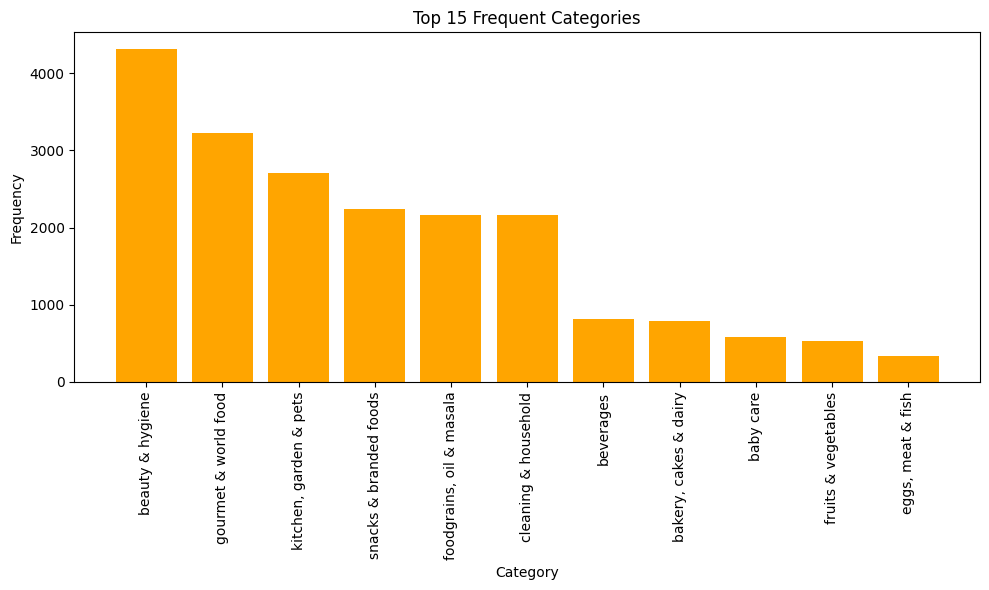

In [5]:
import pandas as pd
from apyori import apriori
from collections import Counter
import matplotlib.pyplot as plt

# 📥 Step 1: Load and preprocess the data
file_path = "C:\\For saving something\\BigBasket Data.csv"
data = pd.read_csv(file_path)

data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# 🧹 Step 2: Select and clean relevant columns
data_clean = data[['Invoice No.', 'Category']].dropna()

# Optional: Save the cleaned intermediate dataset
data_clean.to_csv("data4.csv", index=False)

# 🛒 Step 3: Group into transactions
transactions = data_clean.groupby('Invoice No.')['Category'].apply(lambda x: list(set(x))).tolist()
transactions = [trx for trx in transactions if len(trx) >= 2]  # Optional: filter very small baskets

# 📈 Step 4: Apply Apriori algorithm
rules = apriori(transactions, min_support=0.0025, min_confidence=0.6, min_lift=1.0)

# 📦 Step 5: Extract all rules
results = []
for rule in rules:
    for stat in rule.ordered_statistics:
        base = tuple(stat.items_base)
        add = tuple(stat.items_add)
        if base and add:
            results.append((base, add, rule.support, stat.confidence, stat.lift))

# Save all rules to CSV
rules_df = pd.DataFrame(results, columns=["Antecedent", "Consequent", "Support", "Confidence", "Lift"])
rules_df.to_csv("all_bigbasket_rules.csv", index=False)
print(f"✅ Total Rules Extracted: {len(rules_df)}")
print("\nTop 5 Rules by Lift:\n", rules_df.sort_values(by='Lift', ascending=False).head(5))

# 💪 Step 6: Filter strong rules
strong_rules_df = rules_df[(rules_df['Confidence'] >= 0.75) & (rules_df['Lift'] >= 1.1)]
strong_rules_df.to_csv("strong_bigbasket_rules.csv", index=False)
print(f"\n✅ Strong Rules Retained: {len(strong_rules_df)}")

# 🎯 Step 7: MBA Accuracy Calculation
correct = 0
total = 0

for _, row in strong_rules_df.iterrows():
    ant = set(row['Antecedent'])
    con = set(row['Consequent'])
    for trx in transactions:
        trx_set = set(trx)
        if ant.issubset(trx_set):
            total += 1
            if con.issubset(trx_set):
                correct += 1

mba_accuracy = round((correct / total) * 100, 2) if total else 0
print("\n🎯 MBA Rule Accuracy:", mba_accuracy, "%")

# 📊 Step 8: Plot top 15 frequent categories
item_counts = Counter([item for trx in transactions for item in trx])
top_items = item_counts.most_common(15)
items, counts = zip(*top_items)

plt.figure(figsize=(10, 6))
plt.bar(items, counts, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Top 15 Frequent Categories')
plt.tight_layout()
plt.show()



Category Frequency Distribution:
Category
beauty & hygiene            7867
gourmet & world food        4690
kitchen, garden & pets      3580
snacks & branded foods      2814
foodgrains, oil & masala    2676
cleaning & household        2675
beverages                    885
bakery, cakes & dairy        851
baby care                    610
fruits & vegetables          557
eggs, meat & fish            350
Name: count, dtype: int64

Example transactions (first 3): [['gourmet & world food', 'kitchen, garden & pets', 'beverages', 'beauty & hygiene'], ['cleaning & household', 'gourmet & world food', 'foodgrains, oil & masala', 'kitchen, garden & pets', 'beauty & hygiene'], ['snacks & branded foods', 'gourmet & world food', 'kitchen, garden & pets', 'beauty & hygiene']]

📁 All 35 rules saved to 'aaall_apriori_rules.csv'

🔝 Top 5 Rules by Lift:
                                            Antecedent  \
27  (baby care, cleaning & household, gourmet & wo...   
26  (cleaning & household, gourmet & 

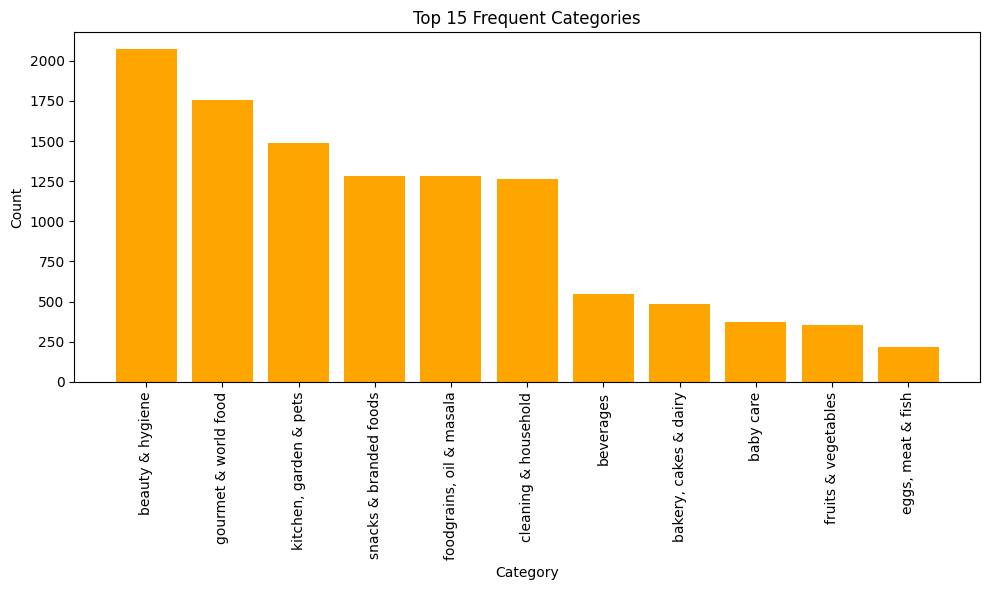

In [ ]:
import pandas as pd
from apyori import apriori
from collections import Counter
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# Display category frequency
category_counts = data['Category'].value_counts()
print("\nCategory Frequency Distribution:")
print(category_counts.head(20))

# Use top 12 categories for better co-occurrence
top_categories = category_counts.head(12).index.tolist()
filtered_data = data[data['Category'].isin(top_categories)]

# Generate transactions (keep those with >= 4 unique categories)
transactions = (
    filtered_data.groupby('Invoice No.')['Category']
    .apply(lambda x: list(set(x)))  # Remove duplicates
    .tolist()
)
transactions = [t for t in transactions if len(t) >= 4]

# Show first few transactions
print(f"\nExample transactions (first 3): {transactions[:3]}")

# Generate association rules using Apriori
rules = apriori(
    transactions,
    min_support=0.0025,   # Lower support to capture more patterns
    min_confidence=0.6,   # Acceptable confidence threshold
    min_lift=1.0          # Keep all, will filter later
)

# Extract rule components
results = []
for rule in rules:
    for stat in rule.ordered_statistics:
        base, add = tuple(stat.items_base), tuple(stat.items_add)
        if base and add:
            results.append((base, add, rule.support, stat.confidence, stat.lift))

# Create DataFrame from all rules
if len(results) == 0:
    print("\n❌ No rules generated.")
    exit()

rules_df = pd.DataFrame(results, columns=["Antecedent", "Consequent", "Support", "Confidence", "Lift"])

# Save all rules to CSV
rules_df.to_csv("aaaall_apriori_rules.csv", index=False)
print(f"\n📁 All {len(rules_df)} rules saved to 'aaall_apriori_rules.csv'")

print("\n🔝 Top 5 Rules by Lift:\n", rules_df.sort_values(by='Lift', ascending=False).head(5))

# --- 🔍 Filter Strong Rules for Accuracy Check ---
filtered_rules_df = rules_df[
    (rules_df['Confidence'] >= 0.75) & 
    (rules_df['Lift'] >= 1.1)
]

print(f"\n✅ Filtered Strong Rules: {len(filtered_rules_df)} retained from {len(rules_df)}")

# Save filtered strong rules
filtered_rules_df.to_csv("fillltered_high_accuracy_rulesss.csv", index=False)
print("\n📄 Filtered Strong Rules Saved as 'filtered_high_accuracy_rules.csv'")

# --- ✅ Accuracy Calculation ---
correct = 0
total = 0

for _, row in filtered_rules_df.iterrows():
    ant = set(row['Antecedent'])
    con = set(row['Consequent'])
    for trx in transactions:
        trx_set = set(trx)
        if ant.issubset(trx_set):
            total += 1
            if con.issubset(trx_set):
                correct += 1

mba_accuracy = round((correct / total) * 100, 2) if total else 0
print("\n🎯 MBA Rule Accuracy (Filtered):", mba_accuracy, "%")

# --- 📊 Visualize Top Items ---
item_counts = Counter([item for trx in transactions for item in trx])
top_items = item_counts.most_common(15)
items, counts = zip(*top_items)

plt.figure(figsize=(10, 6))
plt.bar(items, counts, color='orange')
plt.xticks(rotation=90)
plt.title("Top 15 Frequent Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



🎯 MBA Rule Accuracy (All): 61.51 %

Top 10 Rules by Lift:
                                            Antecedent  \
74         (Kitchen, Garden & Pets, Eggs, Meat & Fish)   
70                 (Kitchen, Garden & Pets, Beverages)   
119  (Kitchen, Garden & Pets, Foodgrains, Oil & Mas...   
100  (Kitchen, Garden & Pets, Beauty & Hygiene, Bev...   
108  (Cleaning & Household, Gourmet & World Food, F...   
81   (Gourmet & World Food, Snacks & Branded Foods,...   
88   (Kitchen, Garden & Pets, Beauty & Hygiene, Bak...   
41                       (Beauty & Hygiene, Beverages)   
80   (Beauty & Hygiene, Baby Care, Snacks & Branded...   
69               (Foodgrains, Oil & Masala, Beverages)   

                  Consequent   Support  Confidence      Lift  
74   (Gourmet & World Food,)  0.012145    0.589552  1.151317  
70   (Gourmet & World Food,)  0.030131    0.573099  1.119187  
119  (Gourmet & World Food,)  0.010300    0.567797  1.108831  
100  (Gourmet & World Food,)  0.020446    0.565957

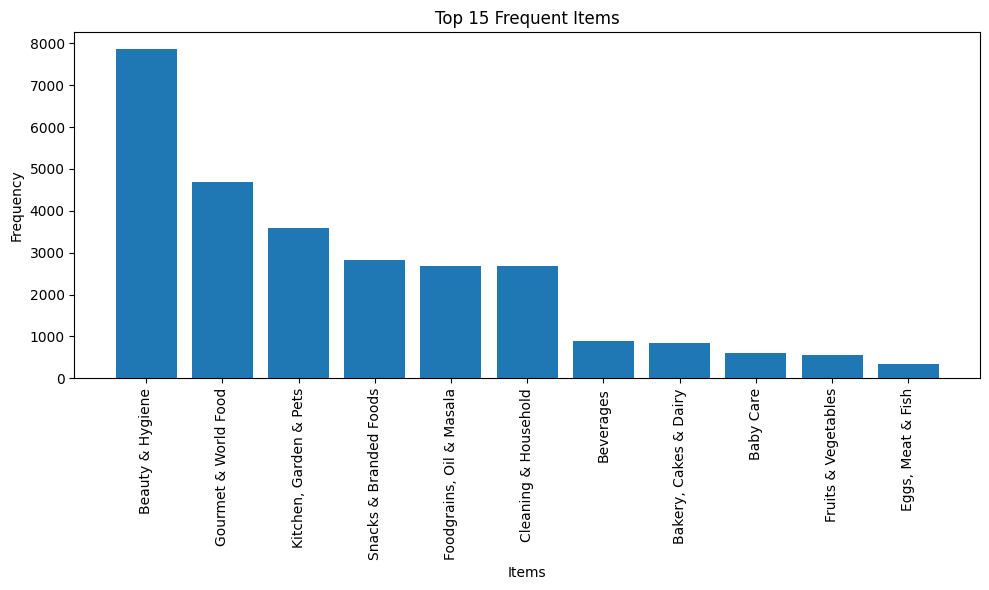

In [12]:
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
file_path = "C:\\For saving something\\BigBasket Data.csv"
data = pd.read_csv(file_path)

# Ensure correct datatypes
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str)

# Extract relevant columns
data_new = data[['Invoice No.', 'Category']].dropna()

# Prepare transactions list
transactions = data_new.groupby('Invoice No.')['Category'].apply(list).tolist()

# Apply Apriori algorithm
rules = apriori(transactions, min_support=0.01, min_confidence=0.50)

# Parse results into list
results = []
for rule in rules:
    for ordered_stat in rule.ordered_statistics:
        base = tuple(ordered_stat.items_base)
        add = tuple(ordered_stat.items_add)
        confidence = ordered_stat.confidence
        lift = ordered_stat.lift
        results.append((base, add, rule.support, confidence, lift))

# Create DataFrame from rules
rules_df = pd.DataFrame(results, columns=["Antecedent", "Consequent", "Support", "Confidence", "Lift"])

# Filter out rules with empty antecedents
rules_df = rules_df[rules_df['Antecedent'].apply(lambda x: len(x) > 0)]

# --- ✅ Accuracy Calculation ---
correct = 0
total = 0

for _, row in rules_df.iterrows():
    ant = set(row['Antecedent'])
    con = set(row['Consequent'])
    for trx in transactions:
        trx_set = set(trx)
        if ant.issubset(trx_set):
            total += 1
            if con.issubset(trx_set):
                correct += 1

mba_accuracy = round((correct / total) * 100, 2) if total else 0
print("\n🎯 MBA Rule Accuracy (All):", mba_accuracy, "%")

# Sort and show top 10 rules by Lift
print("\nTop 10 Rules by Lift:")
print(rules_df.sort_values(by="Lift", ascending=False).head(10))

# Save rules to CSV
rules_df.to_csv("big_basket_rules_cleanedd.csv", index=False)

# Optional: Plot Top 15 Frequent Items
item_counts = Counter([item for transaction in transactions for item in transaction])
top_items = item_counts.most_common(15)
items, counts = zip(*top_items)

plt.figure(figsize=(10, 6))
plt.bar(items, counts)
plt.xticks(rotation=90)
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top 15 Frequent Items')
plt.tight_layout()
plt.show()



Category Frequency Distribution:
Category
beauty & hygiene            7867
gourmet & world food        4690
kitchen, garden & pets      3580
snacks & branded foods      2814
foodgrains, oil & masala    2676
cleaning & household        2675
beverages                    885
bakery, cakes & dairy        851
baby care                    610
fruits & vegetables          557
eggs, meat & fish            350
Name: count, dtype: int64

✅ Total transactions used: 5872

📁 Total rules generated: 61
✅ All rules saved to 'all_apriori_rules.csv'

🔒 Strong rules after filtering: 11
📄 Filtered rules saved to 'filtered_high_accuracy_rules.csv'

🎯 MBA Rule Accuracy (Filtered): 84.21 %


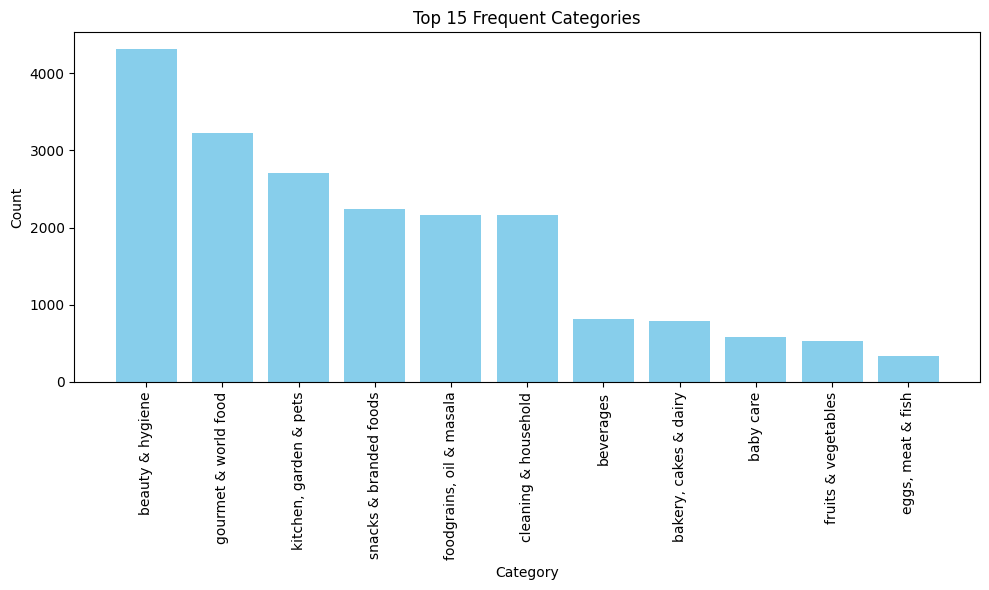

In [15]:
import pandas as pd
from apyori import apriori
from collections import Counter
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# Display category frequency
category_counts = data['Category'].value_counts()
print("\nCategory Frequency Distribution:")
print(category_counts.head(30))

# Use top 30 categories for better co-occurrence
top_categories = category_counts.head(30).index.tolist()
filtered_data = data[data['Category'].isin(top_categories)]

# Generate transactions (keep those with >= 2 unique categories)
transactions = (
    filtered_data.groupby('Invoice No.')['Category']
    .apply(lambda x: list(set(x)))  # Remove duplicates
    .tolist()
)
transactions = [t for t in transactions if len(t) >= 2]
print("\n✅ Total transactions used:", len(transactions))

# --- 🧠 Apriori Algorithm ---
rules = apriori(
    transactions,
    min_support=0.0025,   # Lower support to capture more patterns
    min_confidence=0.6,   # Moderate confidence
    min_lift=1.0          # Keep all for now
)

# --- 🧪 Extract All Rules ---
results = []
for rule in rules:
    for stat in rule.ordered_statistics:
        base, add = tuple(stat.items_base), tuple(stat.items_add)
        if base and add:
            results.append((base, add, rule.support, stat.confidence, stat.lift))

# Save ALL rules
all_rules_df = pd.DataFrame(results, columns=["Antecedent", "Consequent", "Support", "Confidence", "Lift"])
all_rules_df.to_csv("alol_apriori_rules.csv", index=False)
print(f"\n📁 Total rules generated: {len(all_rules_df)}")
print("✅ All rules saved to 'all_apriori_rules.csv'")

# --- 🔍 Filter Strong Rules ---
filtered_rules_df = all_rules_df[
    (all_rules_df['Confidence'] >= 0.75) & 
    (all_rules_df['Lift'] >= 1.1)
]

filtered_rules_df.to_csv("filtered_high_accuracy_rulles.csv", index=False)
print(f"\n🔒 Strong rules after filtering: {len(filtered_rules_df)}")
print("📄 Filtered rules saved to 'filtered_high_accuracy_rules.csv'")

# --- 🎯 Calculate MBA Rule Accuracy ---
correct = 0
total = 0

for _, row in filtered_rules_df.iterrows():
    ant = set(row['Antecedent'])
    con = set(row['Consequent'])
    for trx in transactions:
        trx_set = set(trx)
        if ant.issubset(trx_set):
            total += 1
            if con.issubset(trx_set):
                correct += 1

mba_accuracy = round((correct / total) * 100, 2) if total else 0
print("\n🎯 MBA Rule Accuracy (Filtered):", mba_accuracy, "%")

# --- 📊 Visualize Top 15 Frequent Categories ---
item_counts = Counter([item for trx in transactions for item in trx])
top_items = item_counts.most_common(15)
items, counts = zip(*top_items)

plt.figure(figsize=(10, 6))
plt.bar(items, counts, color='skyblue')
plt.xticks(rotation=90)
plt.title("Top 15 Frequent Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import pickle
from apyori import apriori

# Load and preprocess the data
data = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# Use top 12 categories for better co-occurrence
category_counts = data['Category'].value_counts()
top_categories = category_counts.head(12).index.tolist()
filtered_data = data[data['Category'].isin(top_categories)]

# Generate transactions (with at least 4 unique categories)
transactions = (
    filtered_data.groupby('Invoice No.')['Category']
    .apply(lambda x: list(set(x)))
    .tolist()
)
transactions = [t for t in transactions if len(t) >= 4]

# Generate association rules using Apriori
rules = apriori(
    transactions,
    min_support=0.0025,
    min_confidence=0.6,
    min_lift=1.0
)

# Extract rule components
results = []
for rule in rules:
    for stat in rule.ordered_statistics:
        base, add = tuple(stat.items_base), tuple(stat.items_add)
        if base and add:
            results.append((base, add, rule.support, stat.confidence, stat.lift))

# Create DataFrame
rules_df = pd.DataFrame(results, columns=["Antecedent", "Consequent", "Support", "Confidence", "Lift"])

# Filter rules
filtered_rules_df = rules_df[
    (rules_df['Confidence'] >= 0.75) & 
    (rules_df['Lift'] >= 1.1)
]

# Save the filtered rules as a .pkl model
with open("mba_filtered_rules_model.pkl", "wb") as f:
    pickle.dump(filtered_rules_df, f)

print("✅ Filtered MBA rules saved as 'mba_filtered_rules_model.pkl'")


✅ Filtered MBA rules saved as 'mba_filtered_rules_model.pkl'


In [2]:
from flask import Flask, request, render_template
import pickle
import pandas as pd

# Initialize Flask app
app = Flask(__name__)

# Load the filtered MBA rules
with open("mba_filtered_rules_model.pkl", "rb") as file:
    rules_df = pickle.load(file)

@app.route("/", methods=["GET", "POST"])
def index():
    prediction = None
    if request.method == "POST":
        input_items = request.form.get("items").lower().split(",")
        input_items = [item.strip() for item in input_items]

        # Predict using filtered MBA rules
        suggestions = set()
        for _, row in rules_df.iterrows():
            antecedent = set(row["Antecedent"])
            consequent = set(row["Consequent"])
            if antecedent.issubset(set(input_items)):
                suggestions.update(consequent)

        prediction = ", ".join(suggestions) if suggestions else "No suggestions found."

    return render_template("index.html", prediction=prediction)

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\Users\Nitharshna\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3557: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import pickle
df = pickle.load(open("mba_filtered_rules_model.pkl", "rb"))
print(df.head())
print(df.columns)


                                           Antecedent  \
7   (eggs, meat & fish, kitchen, garden & pets, ba...   
18  (snacks & branded foods, baby care, beverages,...   
20  (baby care, cleaning & household, beverages, g...   
27  (cleaning & household, beauty & hygiene, gourm...   
32  (snacks & branded foods, kitchen, garden & pet...   

                   Consequent   Support  Confidence      Lift  
7     (gourmet & world food,)  0.002836    0.875000  1.229084  
18        (beauty & hygiene,)  0.006888    0.944444  1.124404  
20  (snacks & branded foods,)  0.003647    0.818182  1.572642  
27  (snacks & branded foods,)  0.003241    0.888889  1.708550  
32        (beauty & hygiene,)  0.003647    1.000000  1.190545  
Index(['Antecedent', 'Consequent', 'Support', 'Confidence', 'Lift'], dtype='object')


In [4]:
print(rules_df.head())


                                          Antecedent  \
0                     (beverages, eggs, meat & fish)   
1      (beverages, baby care, bakery, cakes & dairy)   
2  (baby care, bakery, cakes & dairy, cleaning & ...   
3       (gourmet & world food, beverages, baby care)   
4   (beverages, baby care, foodgrains, oil & masala)   

                  Consequent   Support  Confidence      Lift  
0        (beauty & hygiene,)  0.014992    0.880952  1.048814  
1        (beauty & hygiene,)  0.003647    0.900000  1.071491  
2        (beauty & hygiene,)  0.010130    0.862069  1.026332  
3        (beauty & hygiene,)  0.010940    0.870968  1.036926  
4  (kitchen, garden & pets,)  0.003647    0.692308  1.149035  


In [6]:
print(rules_df.head())  # To check the first few rows of the rules
print("Row Antecedent:", row["Antecedent"], type(row["Antecedent"]))


                                          Antecedent  \
0                     (beverages, eggs, meat & fish)   
1      (beverages, baby care, bakery, cakes & dairy)   
2  (baby care, bakery, cakes & dairy, cleaning & ...   
3       (gourmet & world food, beverages, baby care)   
4   (beverages, baby care, foodgrains, oil & masala)   

                  Consequent   Support  Confidence      Lift  
0        (beauty & hygiene,)  0.014992    0.880952  1.048814  
1        (beauty & hygiene,)  0.003647    0.900000  1.071491  
2        (beauty & hygiene,)  0.010130    0.862069  1.026332  
3        (beauty & hygiene,)  0.010940    0.870968  1.036926  
4  (kitchen, garden & pets,)  0.003647    0.692308  1.149035  


NameError: name 'row' is not defined

In [7]:
import pickle

with open("mba_filtered_rules_model.pkl", "rb") as f:
    rules_df = pickle.load(f)

# Show some of the rules
print("\nSample Filtered Rules:")
for i in range(min(10, len(rules_df))):
    print(f"IF {rules_df.iloc[i]['Antecedent']} THEN {rules_df.iloc[i]['Consequent']}")
rules_df["Antecedent"][0]  # Should give: ['eggs, meat & fish']



Sample Filtered Rules:
IF ('kitchen, garden & pets', 'bakery, cakes & dairy', 'eggs, meat & fish') THEN ('gourmet & world food',)
IF ('gourmet & world food', 'beverages', 'baby care', 'snacks & branded foods') THEN ('beauty & hygiene',)
IF ('gourmet & world food', 'beverages', 'baby care', 'cleaning & household') THEN ('snacks & branded foods',)
IF ('beauty & hygiene', 'baby care', 'cleaning & household', 'gourmet & world food', 'beverages') THEN ('snacks & branded foods',)
IF ('baby care', 'gourmet & world food', 'beverages', 'snacks & branded foods', 'kitchen, garden & pets') THEN ('beauty & hygiene',)


KeyError: 0

In [6]:
all_items = set()

for _, row in rules_df.iterrows():
    all_items.update(row["Antecedent"])
    all_items.update(row["Consequent"])

print("All unique items in the model:")
print(sorted(all_items))
rules_df["Antecedent"][0]  # Should give: ['eggs, meat & fish']



All unique items in the model:
['baby care', 'bakery, cakes & dairy', 'beauty & hygiene', 'beverages', 'cleaning & household', 'eggs, meat & fish', 'gourmet & world food', 'kitchen, garden & pets', 'snacks & branded foods']


KeyError: 0

In [8]:
for item in ['eggs, meat & fish', 'kitchen, garden & pets', 'bakery, cakes & dairy']:
    found = any(item in map(str.lower, rule) for rule in rules_df["Antecedent"])
    print(f"{item} found in antecedents: {found}")
print("Model Sample:", rules_df.head(3))




eggs, meat & fish found in antecedents: True
kitchen, garden & pets found in antecedents: True
bakery, cakes & dairy found in antecedents: True
Model Sample:                                            Antecedent  \
7   (kitchen, garden & pets, bakery, cakes & dairy...   
18  (gourmet & world food, beverages, baby care, s...   
20  (gourmet & world food, beverages, baby care, c...   

                   Consequent   Support  Confidence      Lift  
7     (gourmet & world food,)  0.002836    0.875000  1.229084  
18        (beauty & hygiene,)  0.006888    0.944444  1.124404  
20  (snacks & branded foods,)  0.003647    0.818182  1.572642  


In [1]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter

# Load your dataset
data = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# Filter top 12 categories
top_categories = data['Category'].value_counts().head(12).index.tolist()
filtered_data = data[data['Category'].isin(top_categories)]

# Create transactions with at least 4 items
transactions = (
    filtered_data.groupby('Invoice No.')['Category']
    .apply(lambda x: list(set(x)))
    .tolist()
)
transactions = [t for t in transactions if len(t) >= 4]

# Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth
frequent_itemsets = fpgrowth(df, min_support=0.0025, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Filter strong rules like your Apriori setup
filtered_rules = rules[(rules['confidence'] >= 0.75) & (rules['lift'] >= 1.1)]
filtered_rules = filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
filtered_rules.reset_index(drop=True, inplace=True)

# Evaluate accuracy
correct = 0
total = 0

for _, row in filtered_rules.iterrows():
    ant = set(row['antecedents'])
    con = set(row['consequents'])
    for trx in transactions:
        trx_set = set(trx)
        if ant.issubset(trx_set):
            total += 1
            if con.issubset(trx_set):
                correct += 1

accuracy = round((correct / total) * 100, 2) if total else 0

print("🎯 FP-Growth Accuracy (Filtered):", accuracy, "%")
print("🔝 Top Rules by Lift:")
print(filtered_rules.sort_values(by='lift', ascending=False).head(5))

# Optional: Save rules
filtered_rules.to_csv("fp_growth_filtered_rules.csv", index=False)


🎯 FP-Growth Accuracy (Filtered): 90.91 %
🔝 Top Rules by Lift:
                                         antecedents  \
3  (baby care, beauty & hygiene, gourmet & world ...   
2  (beverages, baby care, cleaning & household, g...   
4  (kitchen, garden & pets, eggs, meat & fish, ba...   
1  (kitchen, garden & pets, baby care, gourmet & ...   
0  (beverages, baby care, snacks & branded foods,...   

                consequents   support  confidence      lift  
3  (snacks & branded foods)  0.003241    0.888889  1.708550  
2  (snacks & branded foods)  0.003647    0.818182  1.572642  
4    (gourmet & world food)  0.002836    0.875000  1.229084  
1        (beauty & hygiene)  0.003647    1.000000  1.190545  
0        (beauty & hygiene)  0.006888    0.944444  1.124404  


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter
import time

# Timer Start
start = time.time()

# Load dataset
data = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# Use top categories for frequent co-purchase
top_categories = data['Category'].value_counts().head(12).index.tolist()
filtered_data = data[data['Category'].isin(top_categories)]

# Build transactions
transactions = (
    filtered_data.groupby('Invoice No.')['Category']
    .apply(lambda x: list(set(x)))  # remove duplicates
    .tolist()
)
transactions = [t for t in transactions if len(t) >= 4]

# Encode transactions
te = TransactionEncoder()
df = pd.DataFrame(te.fit(transactions).transform(transactions), columns=te.columns_)

# Apply FP-Growth
frequent_items = fpgrowth(df, min_support=0.003, use_colnames=True)

# Automatically extract rules with good metrics
rules = association_rules(frequent_items, metric="lift", min_threshold=1.1)

# Keep rules with confidence ≥ 0.75 (strong, no extra filter step later)
strong_rules = rules[rules['confidence'] >= 0.75]
strong_rules = strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
strong_rules.reset_index(drop=True, inplace=True)

# Accuracy Evaluation
correct = 0
total = 0
for _, row in strong_rules.iterrows():
    ant = set(row['antecedents'])
    con = set(row['consequents'])
    for trx in transactions:
        trx_set = set(trx)
        if ant.issubset(trx_set):
            total += 1
            if con.issubset(trx_set):
                correct += 1

accuracy = round((correct / total) * 100, 2) if total else 0

# Display Results
print("✅ Total Rules:", len(strong_rules))
print("🎯 Accuracy (FP-Growth, strong rules):", accuracy, "%")
print("⏱️ Time taken: {:.2f} seconds".format(time.time() - start))
print("\n🔝 Top 5 Rules:\n", strong_rules.sort_values(by='lift', ascending=False).head())

# Optional: Save to CSV
strong_rules.to_csv("fp_growth_optimized_rules.csv", index=False)


✅ Total Rules: 4
🎯 Accuracy (FP-Growth, strong rules): 91.49 %
⏱️ Time taken: 2.20 seconds

🔝 Top 5 Rules:
                                          antecedents  \
3  (baby care, beauty & hygiene, gourmet & world ...   
2  (beverages, baby care, cleaning & household, g...   
1  (kitchen, garden & pets, baby care, gourmet & ...   
0  (beverages, baby care, snacks & branded foods,...   

                consequents   support  confidence      lift  
3  (snacks & branded foods)  0.003241    0.888889  1.708550  
2  (snacks & branded foods)  0.003647    0.818182  1.572642  
1        (beauty & hygiene)  0.003647    1.000000  1.190545  
0        (beauty & hygiene)  0.006888    0.944444  1.124404  



Category Frequency Distribution:
Category
beauty & hygiene            7867
gourmet & world food        4690
kitchen, garden & pets      3580
snacks & branded foods      2814
foodgrains, oil & masala    2676
cleaning & household        2675
beverages                    885
bakery, cakes & dairy        851
baby care                    610
fruits & vegetables          557
eggs, meat & fish            350
Name: count, dtype: int64

Example transactions (first 3): [['beverages', 'kitchen, garden & pets', 'beauty & hygiene', 'gourmet & world food'], ['kitchen, garden & pets', 'foodgrains, oil & masala', 'beauty & hygiene', 'gourmet & world food', 'cleaning & household'], ['kitchen, garden & pets', 'snacks & branded foods', 'beauty & hygiene', 'gourmet & world food']]

📁 All 35 rules saved to 'aaall_apriori_rules.csv'

🔝 Top 5 Rules by Lift:
                                            Antecedent  \
27  (baby care, beauty & hygiene, gourmet & world ...   
26  (baby care, gourmet & world food,

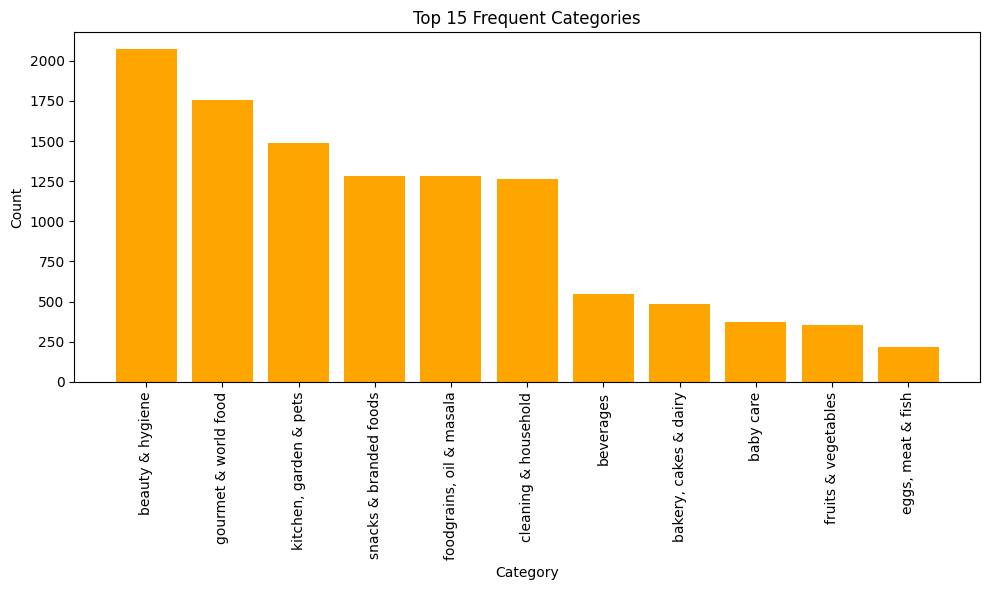

In [3]:
import pandas as pd
from apyori import apriori
from collections import Counter
import matplotlib.pyplot as plt
import time

# ⏱️ Start timer
start = time.time()

# Load and preprocess the data
data = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# Display category frequency
category_counts = data['Category'].value_counts()
print("\nCategory Frequency Distribution:")
print(category_counts.head(20))

# Use top 12 categories for better co-occurrence
top_categories = category_counts.head(12).index.tolist()
filtered_data = data[data['Category'].isin(top_categories)]

# Generate transactions (keep those with >= 4 unique categories)
transactions = (
    filtered_data.groupby('Invoice No.')['Category']
    .apply(lambda x: list(set(x)))  # Remove duplicates
    .tolist()
)
transactions = [t for t in transactions if len(t) >= 4]

print(f"\nExample transactions (first 3): {transactions[:3]}")

# Apriori algorithm
rules = apriori(
    transactions,
    min_support=0.0025,
    min_confidence=0.6,
    min_lift=1.0
)

# Extract rules
results = []
for rule in rules:
    for stat in rule.ordered_statistics:
        base, add = tuple(stat.items_base), tuple(stat.items_add)
        if base and add:
            results.append((base, add, rule.support, stat.confidence, stat.lift))

# Save all rules
if len(results) == 0:
    print("\n❌ No rules generated.")
    exit()

rules_df = pd.DataFrame(results, columns=["Antecedent", "Consequent", "Support", "Confidence", "Lift"])
rules_df.to_csv("aaaall_apriori_rules.csv", index=False)
print(f"\n📁 All {len(rules_df)} rules saved to 'aaall_apriori_rules.csv'")

print("\n🔝 Top 5 Rules by Lift:\n", rules_df.sort_values(by='Lift', ascending=False).head(5))

# Filter strong rules
filtered_rules_df = rules_df[
    (rules_df['Confidence'] >= 0.75) & 
    (rules_df['Lift'] >= 1.1)
]

print(f"\n✅ Filtered Strong Rules: {len(filtered_rules_df)} retained from {len(rules_df)}")
filtered_rules_df.to_csv("fffillltered_high_accuracy_rulesss.csv", index=False)

# Accuracy
correct = 0
total = 0

for _, row in filtered_rules_df.iterrows():
    ant = set(row['Antecedent'])
    con = set(row['Consequent'])
    for trx in transactions:
        trx_set = set(trx)
        if ant.issubset(trx_set):
            total += 1
            if con.issubset(trx_set):
                correct += 1

mba_accuracy = round((correct / total) * 100, 2) if total else 0
print("\n🎯 MBA Rule Accuracy (Filtered):", mba_accuracy, "%")

# ⏱️ End timer
end = time.time()
print("⏳ Total Execution Time: {:.2f} seconds".format(end - start))

# Plot top categories
item_counts = Counter([item for trx in transactions for item in trx])
top_items = item_counts.most_common(15)
items, counts = zip(*top_items)

plt.figure(figsize=(10, 6))
plt.bar(items, counts, color='orange')
plt.xticks(rotation=90)
plt.title("Top 15 Frequent Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



🔢 Total Transactions Used: 5872
🔍 Example Transaction: ['cleaning & household', 'beauty & hygiene', 'gourmet & world food']

⏱️ Execution Time: 1.07 seconds
📈 Total Rules Generated: 241

🔝 Top 5 Rules by Lift:
                                             Antecedent  \
206  (baby care, gourmet & world food, cleaning & h...   
208  (baby care, beauty & hygiene, gourmet & world ...   
132  (baby care, gourmet & world food, cleaning & h...   
114       (baby care, gourmet & world food, beverages)   
211  (kitchen, garden & pets, baby care, gourmet & ...   

                                     Consequent   Support  Confidence  \
206  (snacks & branded foods, beauty & hygiene)  0.001362    0.727273   
208                   (snacks & branded foods,)  0.001362    0.888889   
132                   (snacks & branded foods,)  0.001533    0.818182   
114  (snacks & branded foods, beauty & hygiene)  0.002895    0.531250   
211  (snacks & branded foods, beauty & hygiene)  0.001533    0.529412   



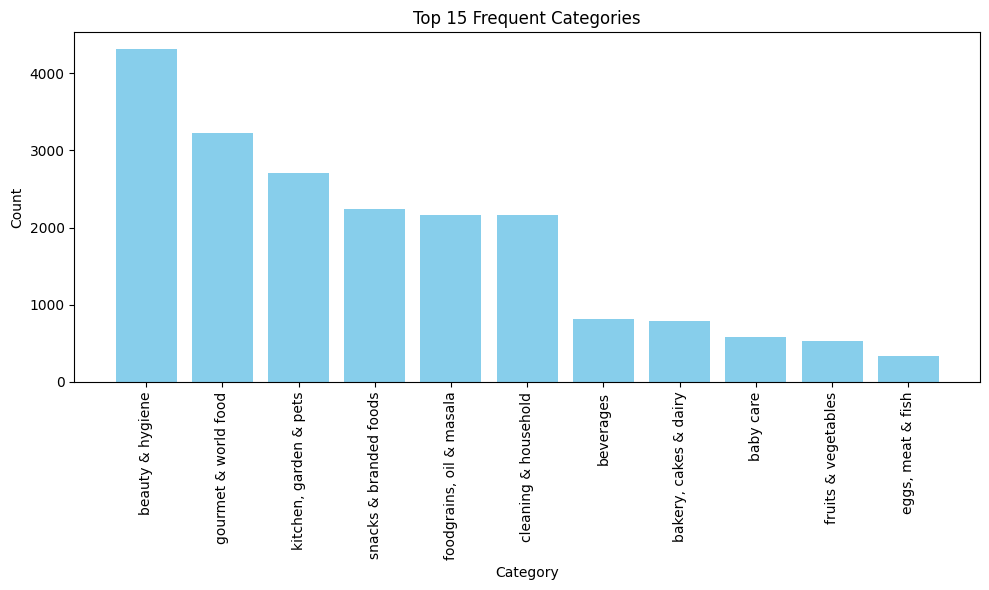

In [4]:
import pandas as pd
from apyori import apriori
from collections import Counter
import matplotlib.pyplot as plt
import time

# Start timer
start_time = time.time()

# Load and preprocess the data
data = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# Use all categories and keep more transactions (≥ 2 items)
transactions = (
    data.groupby('Invoice No.')['Category']
    .apply(lambda x: list(set(x)))  # Remove duplicates
    .tolist()
)
transactions = [t for t in transactions if len(t) >= 2]

print(f"\n🔢 Total Transactions Used: {len(transactions)}")
print(f"🔍 Example Transaction: {transactions[0]}")

# Apply Apriori with lower thresholds to increase execution time
rules = apriori(
    transactions,
    min_support=0.001,     # Lower support = more rules
    min_confidence=0.5,    # Lower confidence = broader pattern
    min_lift=1.0           # Default lift
)

# Extract rule components
results = []
for rule in rules:
    for stat in rule.ordered_statistics:
        base, add = tuple(stat.items_base), tuple(stat.items_add)
        if base and add:
            results.append((base, add, rule.support, stat.confidence, stat.lift))

# Create DataFrame from results
if not results:
    print("\n❌ No rules generated.")
    exit()

rules_df = pd.DataFrame(results, columns=["Antecedent", "Consequent", "Support", "Confidence", "Lift"])

# End timer
end_time = time.time()
execution_time = round(end_time - start_time, 2)

# Save all rules
rules_df.to_csv("apriori_more_rules_high_time.csv", index=False)

# Show results
print(f"\n⏱️ Execution Time: {execution_time} seconds")
print(f"📈 Total Rules Generated: {len(rules_df)}")
print("\n🔝 Top 5 Rules by Lift:\n", rules_df.sort_values(by='Lift', ascending=False).head(5))

# Accuracy calculation (optional)
correct = 0
total = 0

for _, row in rules_df.iterrows():
    ant = set(row['Antecedent'])
    con = set(row['Consequent'])
    for trx in transactions:
        trx_set = set(trx)
        if ant.issubset(trx_set):
            total += 1
            if con.issubset(trx_set):
                correct += 1

accuracy = round((correct / total) * 100, 2) if total else 0
print(f"\n🎯 Accuracy of All Rules: {accuracy}%")

# Plot top items
item_counts = Counter([item for trx in transactions for item in trx])
top_items = item_counts.most_common(15)
items, counts = zip(*top_items)

plt.figure(figsize=(10, 6))
plt.bar(items, counts, color='skyblue')
plt.xticks(rotation=90)
plt.title("Top 15 Frequent Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
